In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ginza
import spacy
%matplotlib inline

In [106]:
def removeZenkakuSpace(df, cols):
    for col in cols:
        df[col] = df[col].str.replace('　', ' ')
    return df

def histEachFavs(df, col, height=3, aspect=4, title=''):
    for fav in sorted(df[FAV].unique()):
        sns.catplot(x=col,data=df.query(f"{FAV} == @fav"),kind='count',height=height, aspect=aspect)
        plt.title(f'{title} fav group:{fav}')
        
def getQueries(df, cols):
    assert type(cols) == str or type(cols) == list, 'cols is str or list'
    queries = []
    if type(cols) == str:
        queries = [f'{cols} == {flag}' for flag in sorted(df[cols].unique())]
    elif type(cols) == list:
        for col in cols:
            col_queries = [f'{col} == {flag}' for flag in sorted(df[col].unique())]
            if len(queries) == 0:
                queries = col_queries
            else:
                queries = [f"{q} & {col_queries[0]}" for q in queries] + [f'{q} & {col_queries[1]}' for q in queries]
            
    return queries

def columnUnique(df, col):
    return sorted(df[col].unique())

def histColumnsFavs(df, cols:list, height=3, aspect=6, title=''):
    queries = getQueries(df, cols)
    for query in queries:
        data = df.query(query)
        if len(data) == 0:
            continue
        sns.catplot(x=FAV,data=data,kind='count',height=height, aspect=aspect)
        plt.title(f'{title} {query}')

In [3]:
out_dir = '../output'
train_df = pd.read_csv('../dataset/train.csv')
test_df = pd.read_csv('../dataset/test.csv')
ID = 'ncode'
FAV = 'fav_novel_cnt_bin'
favs = sorted(train_df[FAV].unique())

# train_df.userid = train_df.userid.astype('str')
# train_df.genre = train_df.genre.astype('str')
# test_df.userid = test_df.userid.astype('str')
# test_df.genre = test_df.genre.astype('str')
str_cols = ['title', 'story', 'keyword', 'writer']
for df in [train_df, test_df]:
    removeZenkakuSpace(df, str_cols)

In [18]:
train_df.columns

Index(['ncode', 'general_firstup', 'title', 'story', 'keyword', 'userid',
       'writer', 'biggenre', 'genre', 'novel_type', 'end', 'isstop', 'isr15',
       'isbl', 'isgl', 'iszankoku', 'istensei', 'istenni', 'pc_or_k',
       'fav_novel_cnt_bin'],
      dtype='object')

<Figure size 144x288 with 0 Axes>

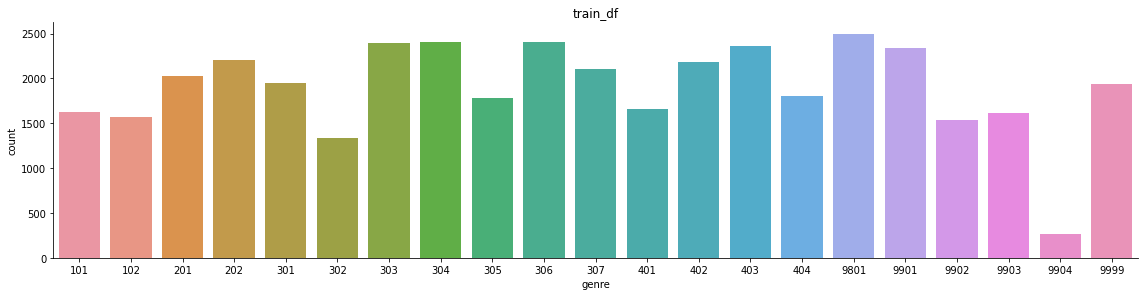

<Figure size 144x288 with 0 Axes>

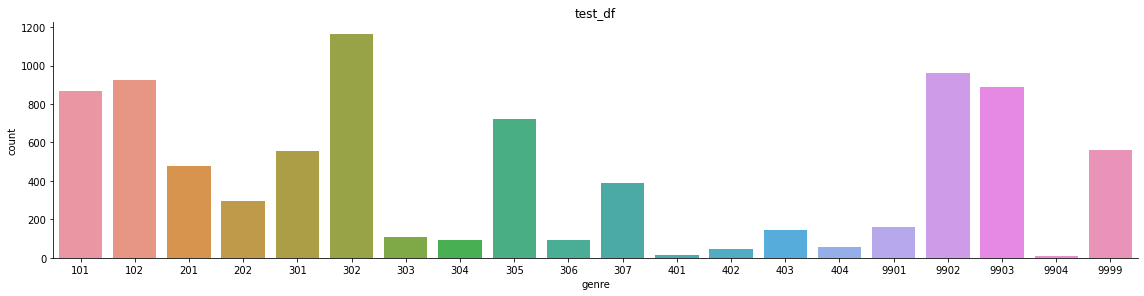

In [86]:
for df, title in zip([train_df,test_df], ['train_df','test_df']):
    plt.figure(figsize=(2,4))
    sns.catplot(x='genre', data=df, kind='count',height=4, aspect=4)
    plt.title(title)
    

<Figure size 144x288 with 0 Axes>

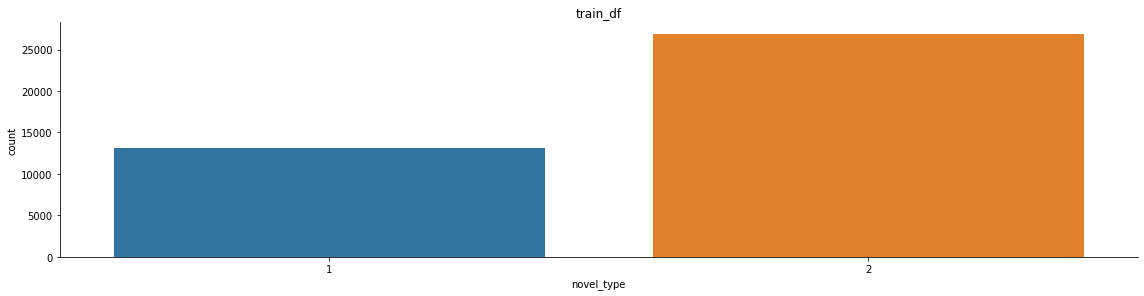

<Figure size 144x288 with 0 Axes>

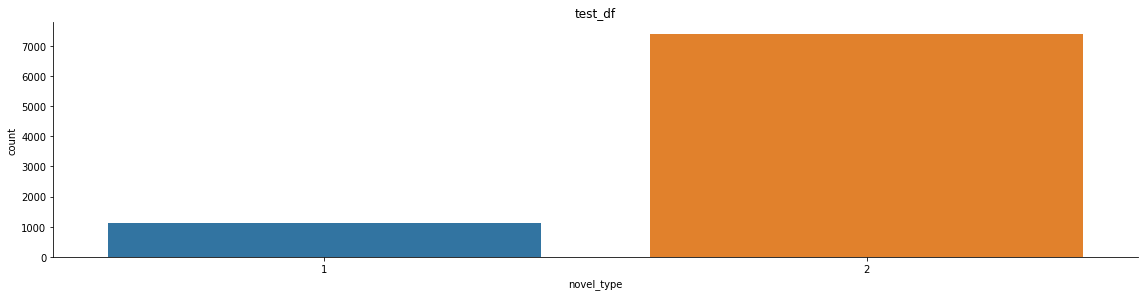

In [87]:
for df, title in zip([train_df,test_df], ['train_df','test_df']):
    plt.figure(figsize=(2,4))
    sns.catplot(x='novel_type', data=df, kind='count',height=4, aspect=4)
    plt.title(title)
    

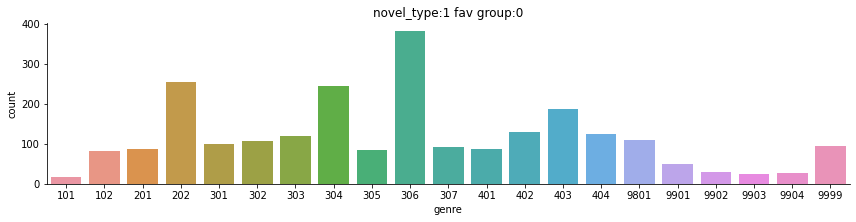

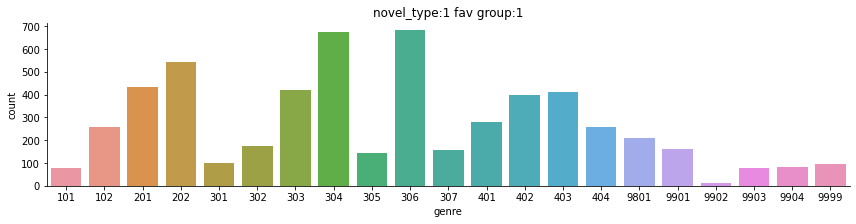

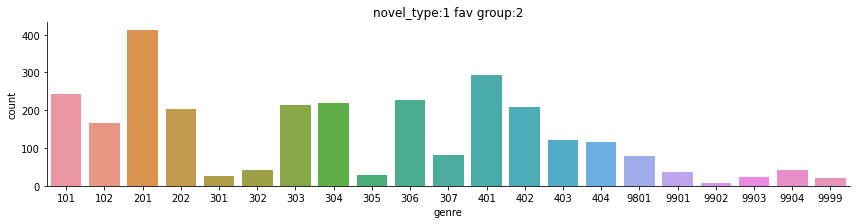

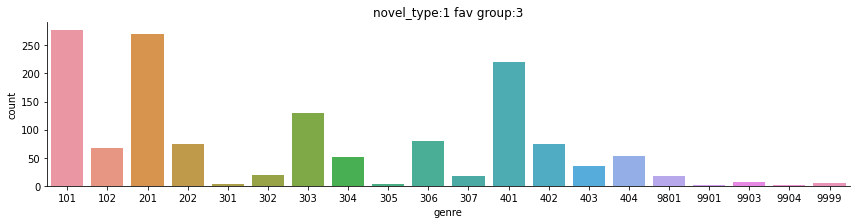

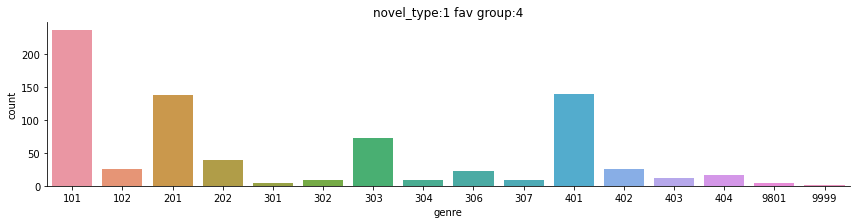

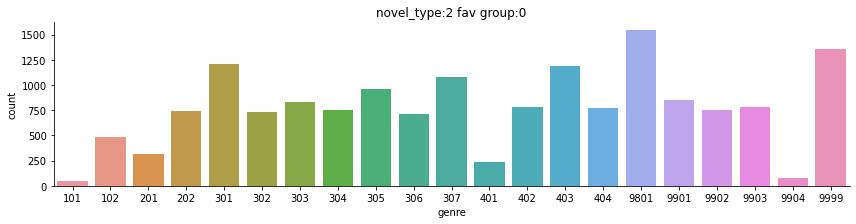

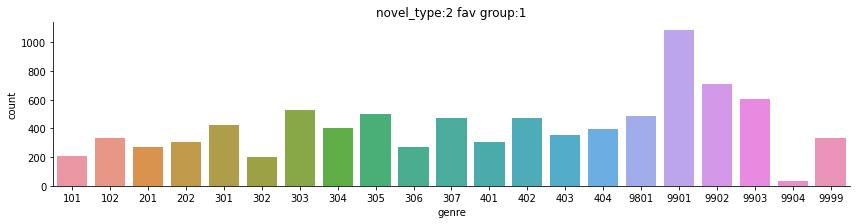

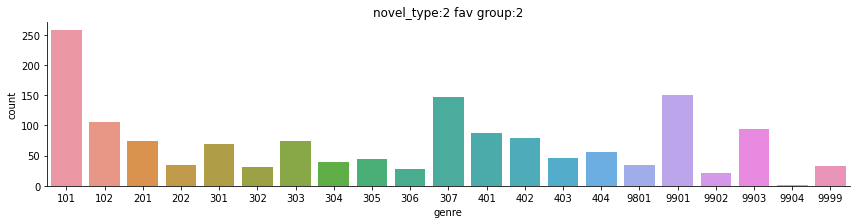

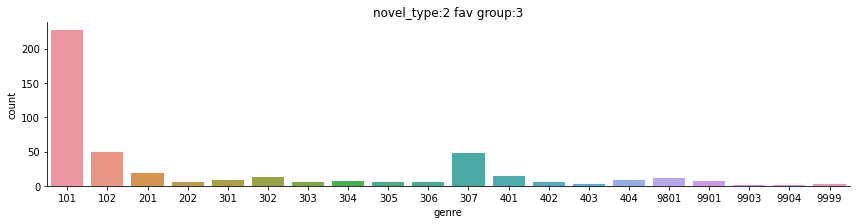

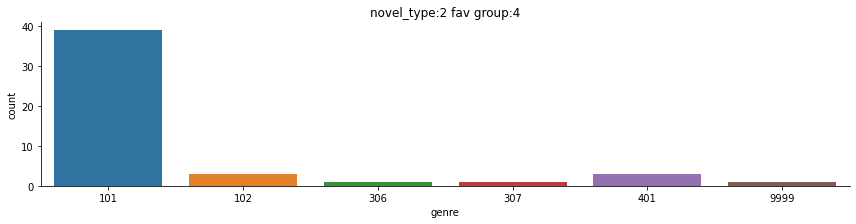

In [97]:
for n_type in train_df.novel_type.unique():
    
    histEachFavs(train_df.query('novel_type == @n_type'), 'genre', title=f'novel_type:{n_type}')

In [48]:
cats//5+1

7

In [84]:
def histEachFavsByCategory(df, df_target, col):
    cats = sorted(df[col].unique())
    for cat in cats:
        fig, axes = plt.subplots(figsize=(30,10), ncols=3, nrows=2)
        for ax, fav in zip(axes.ravel(), favs):
            target_mask = (df[FAV] == fav) & (df[col] == cat)
            ax.hist(df_target.loc[target_mask], bins=100)
            ax.set_xlim(-1,df_target.max())
            ax.set_title(f'bgenre:{cat}, fav:{fav}, num={target_mask.sum()}')

<ipython-input-84-85669e0521e0>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(figsize=(30,10), ncols=3, nrows=2)


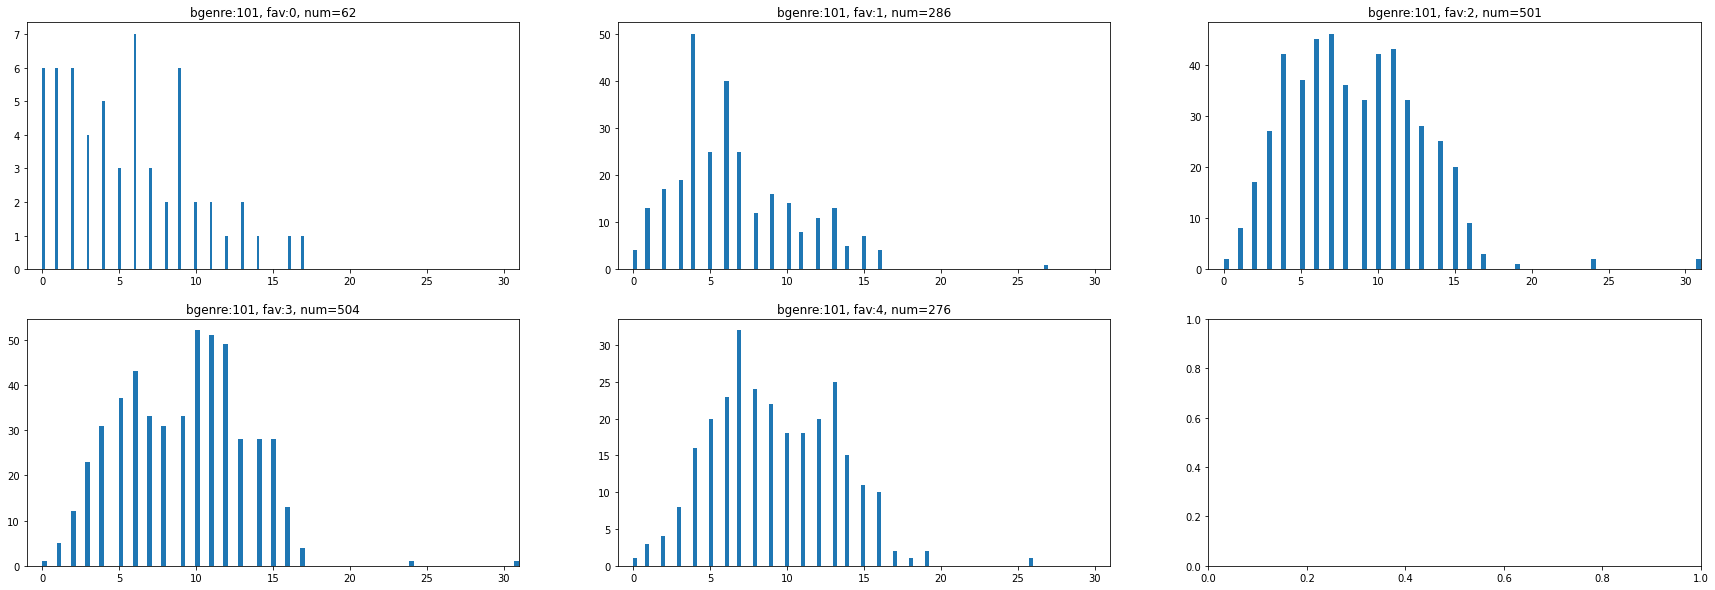

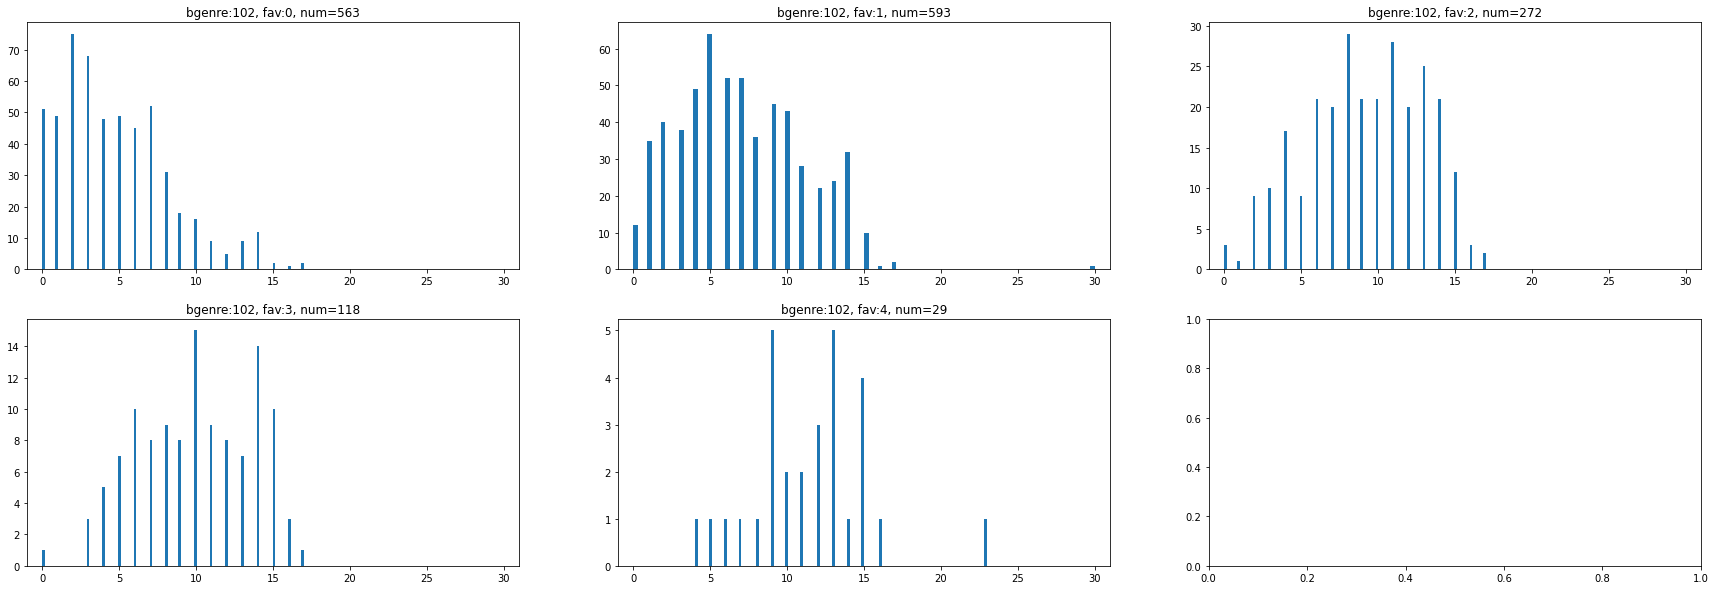

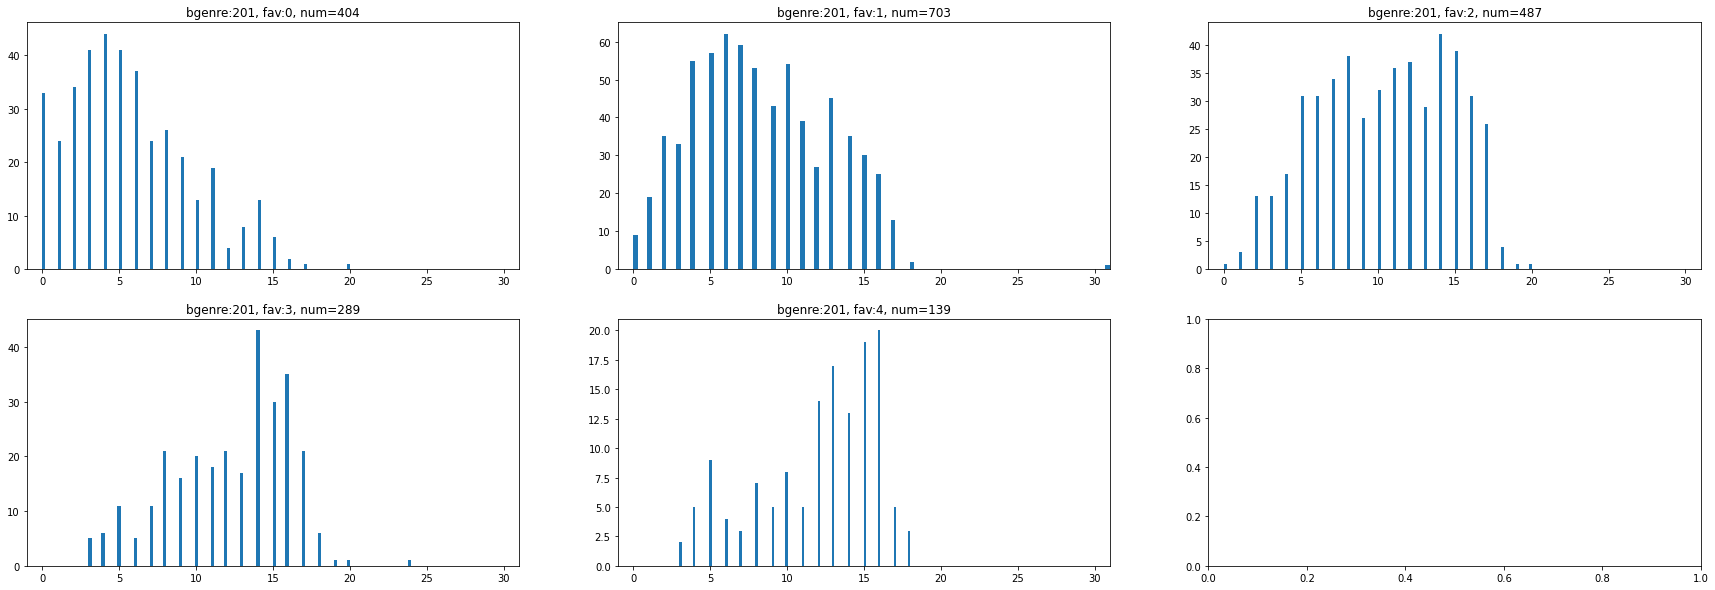

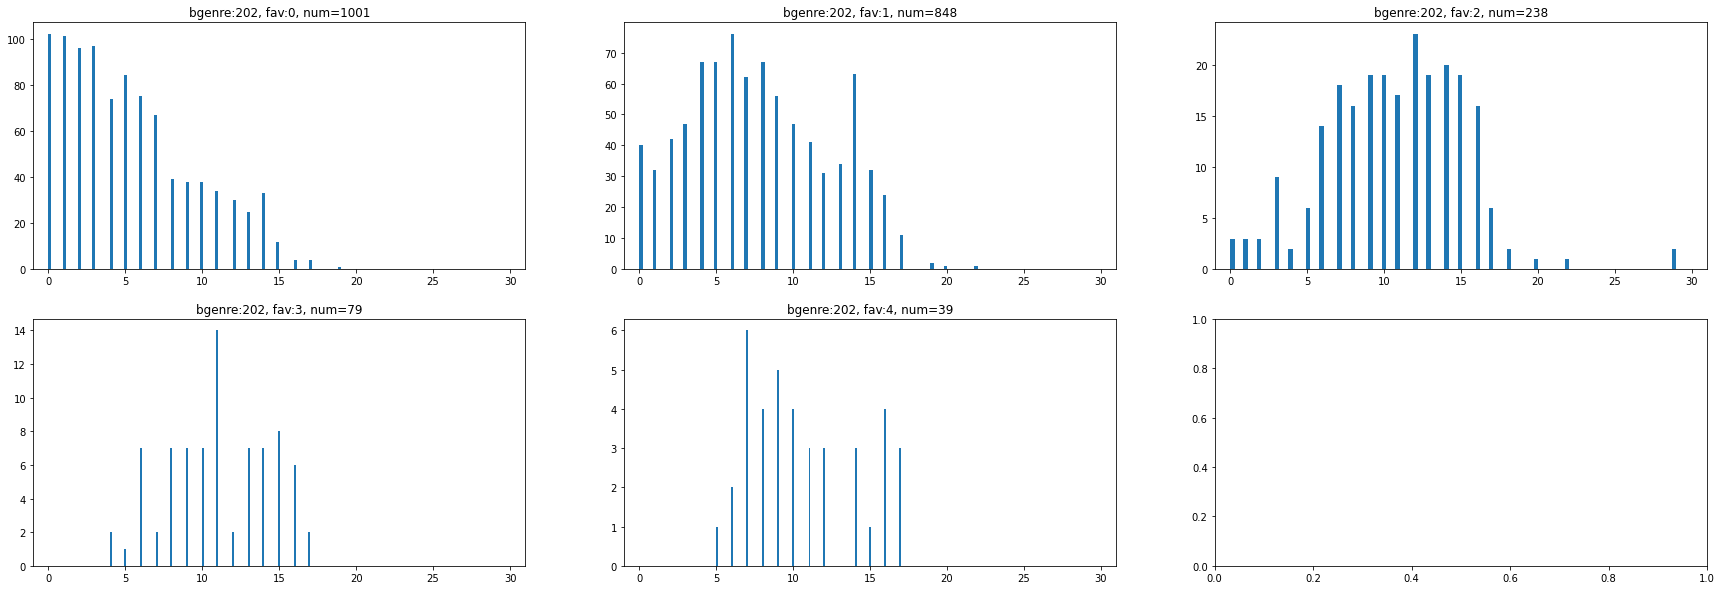

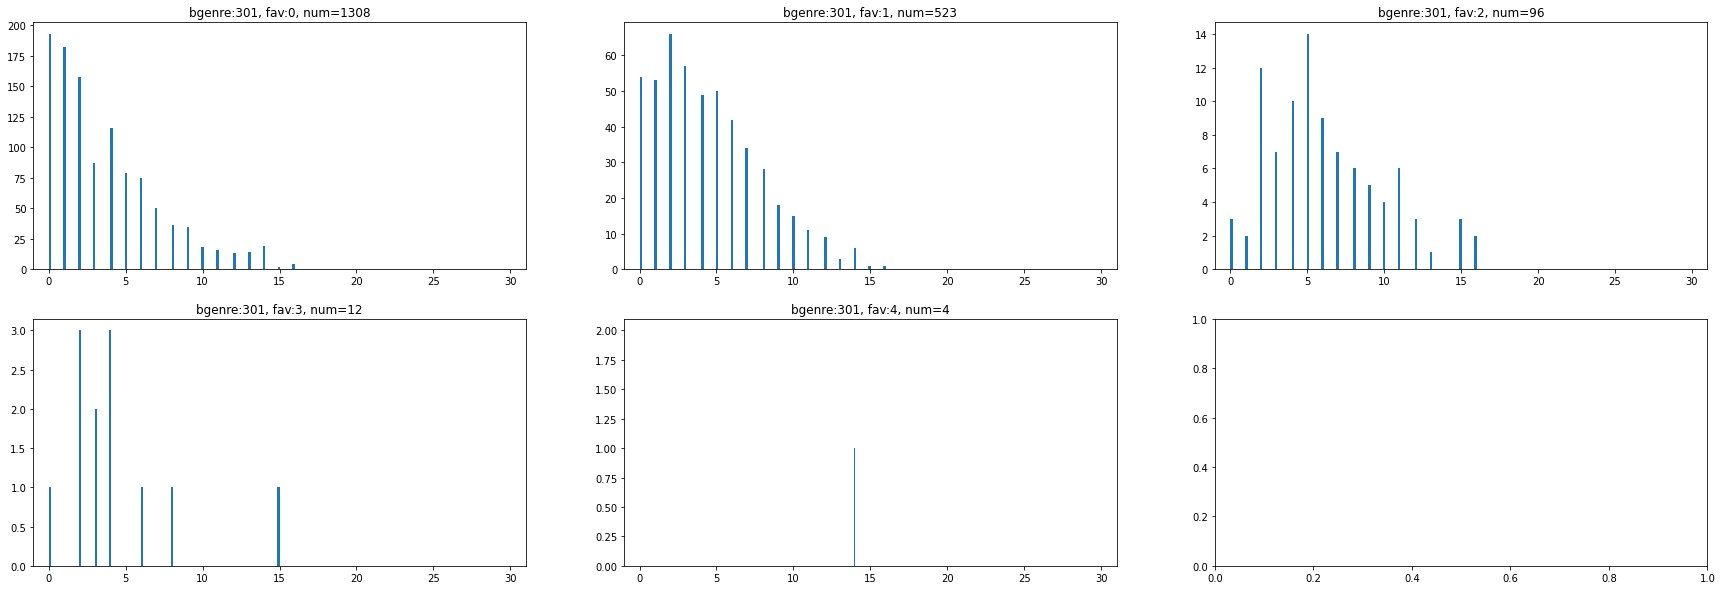

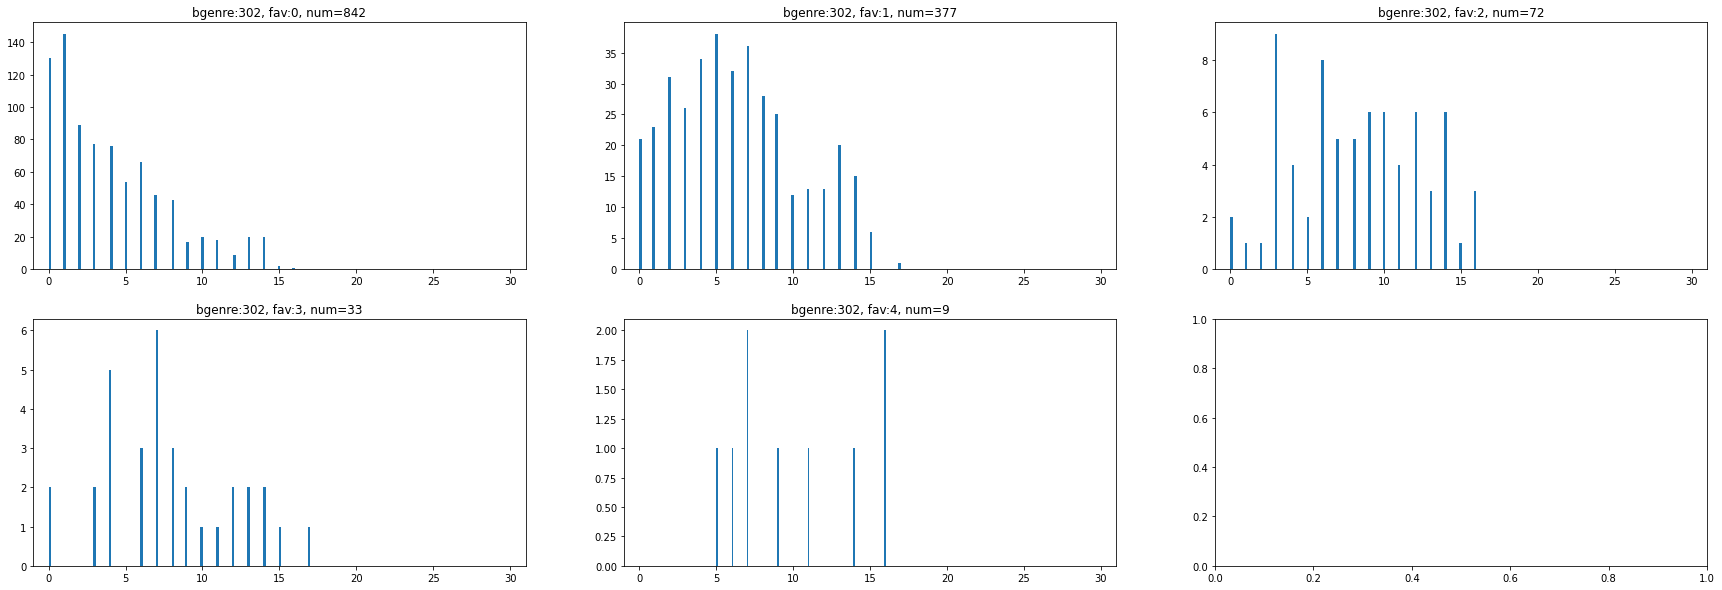

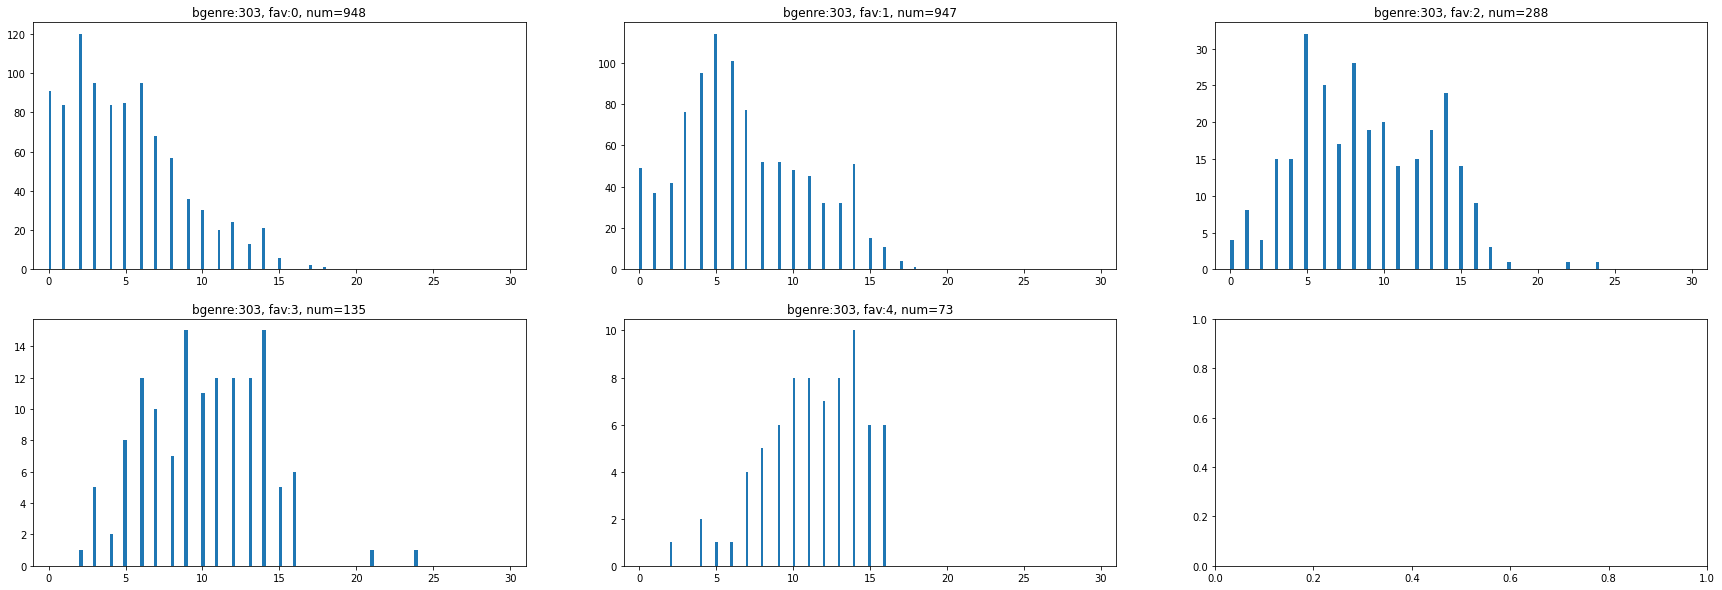

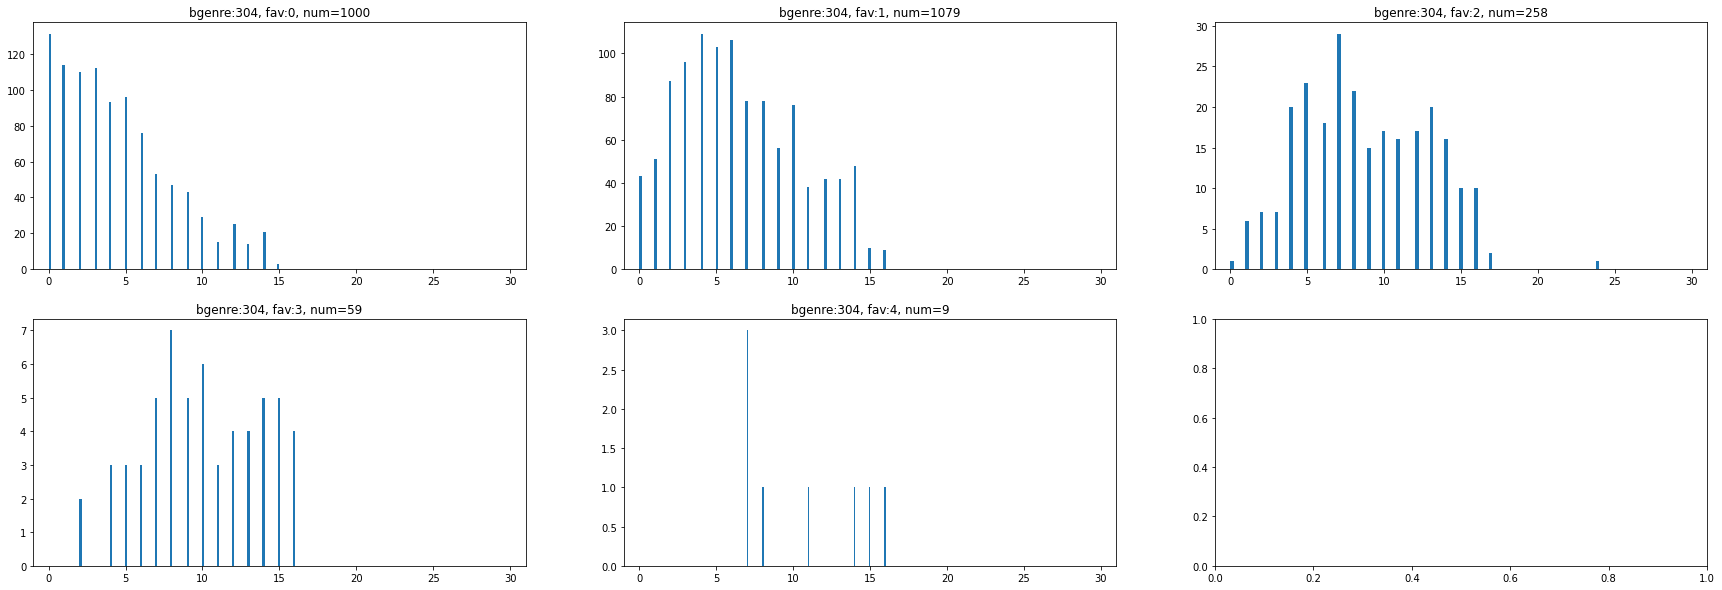

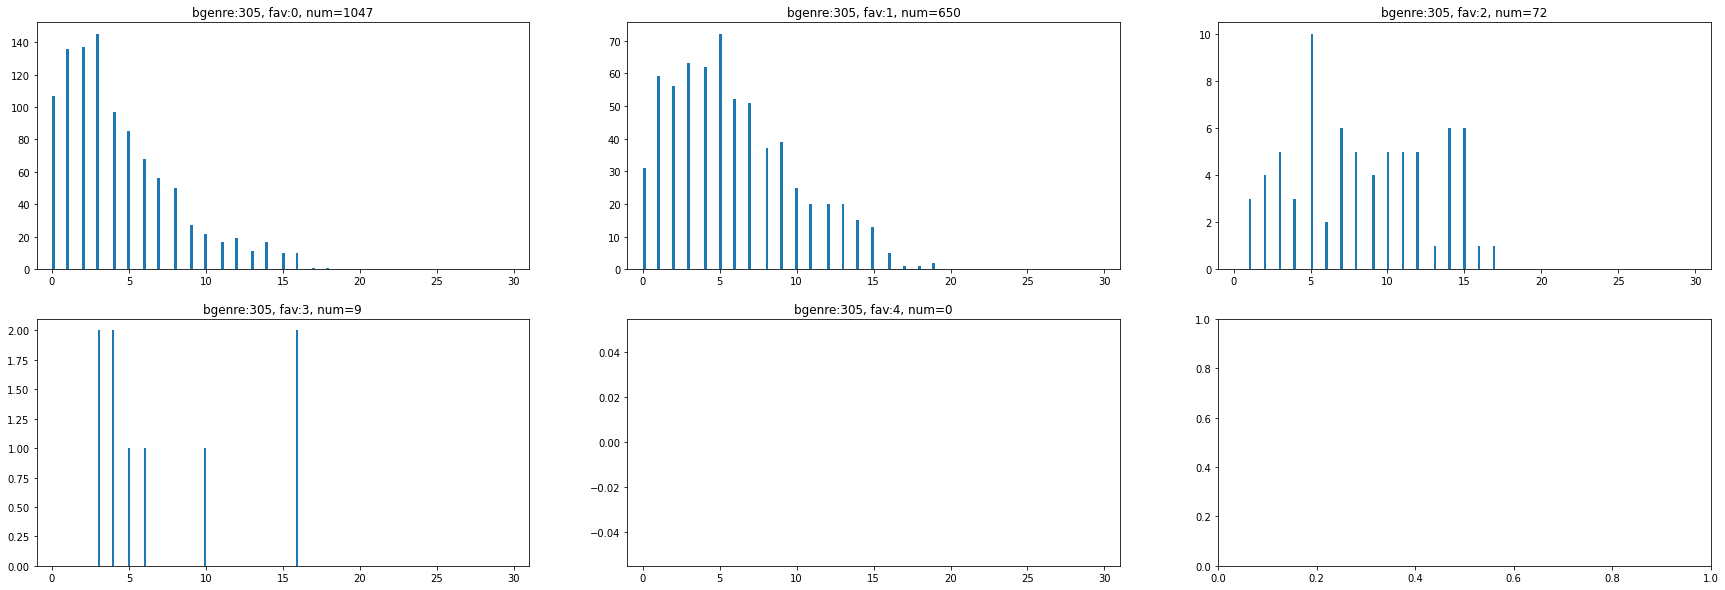

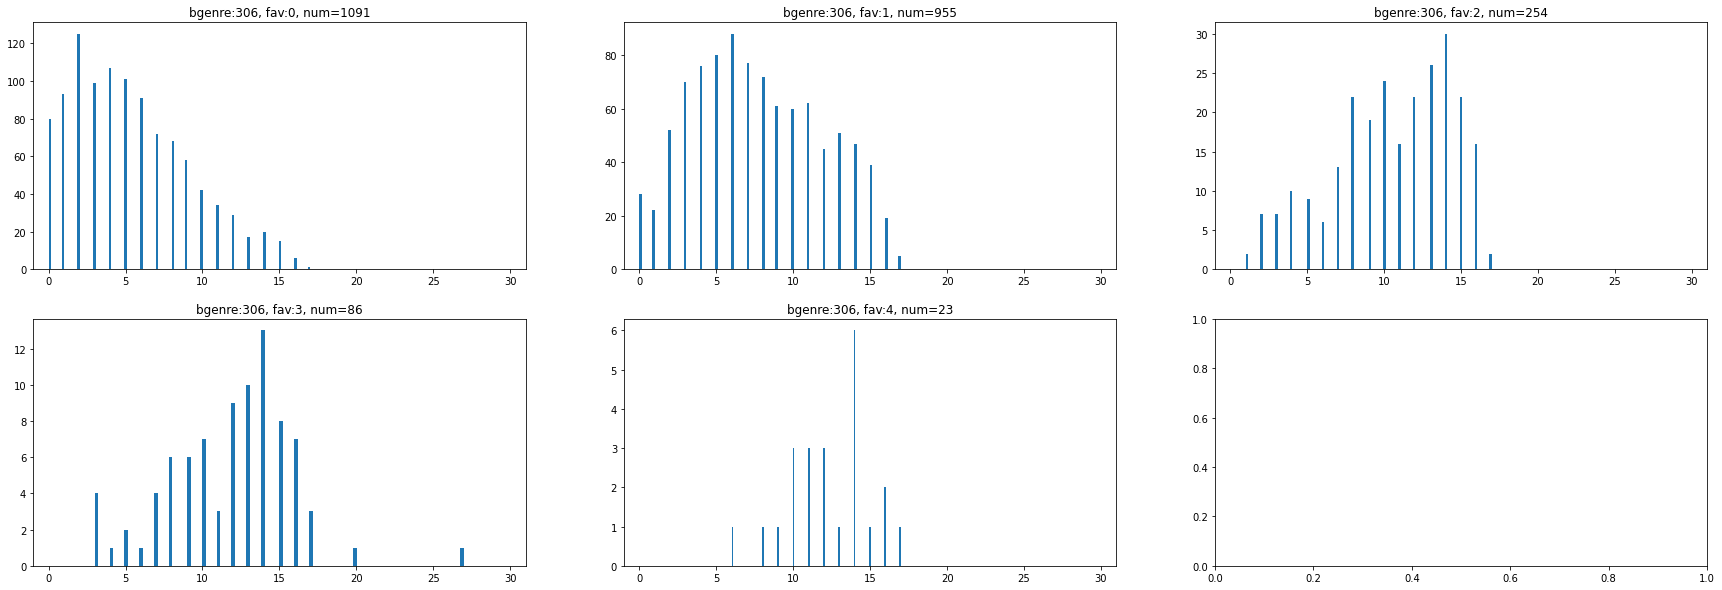

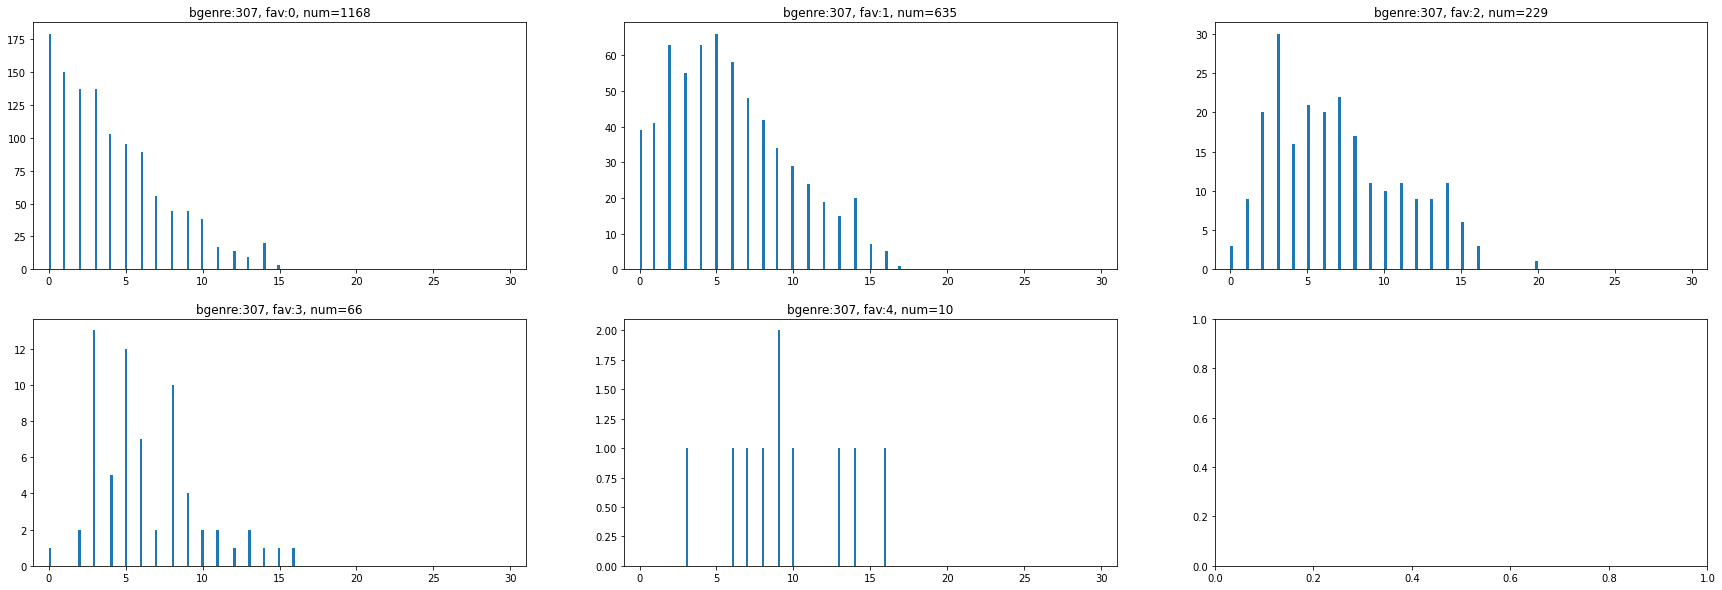

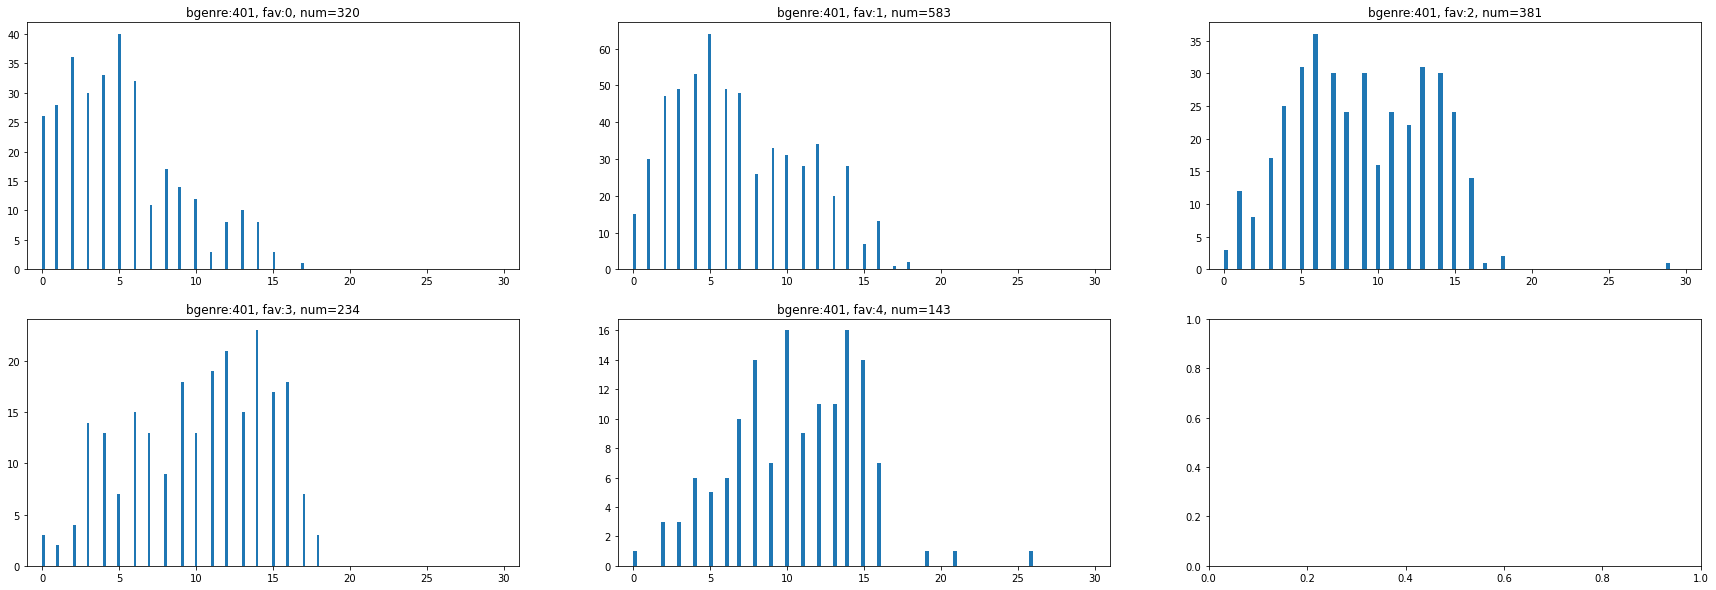

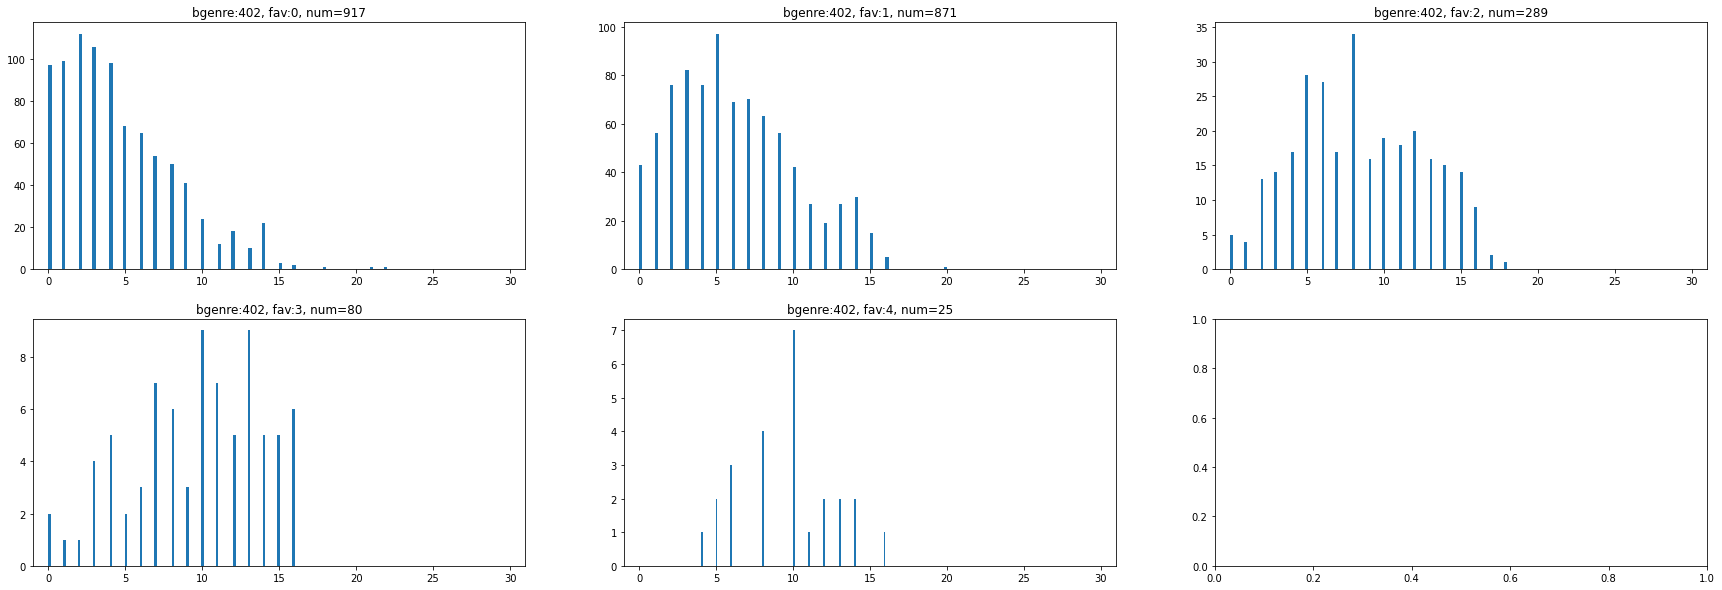

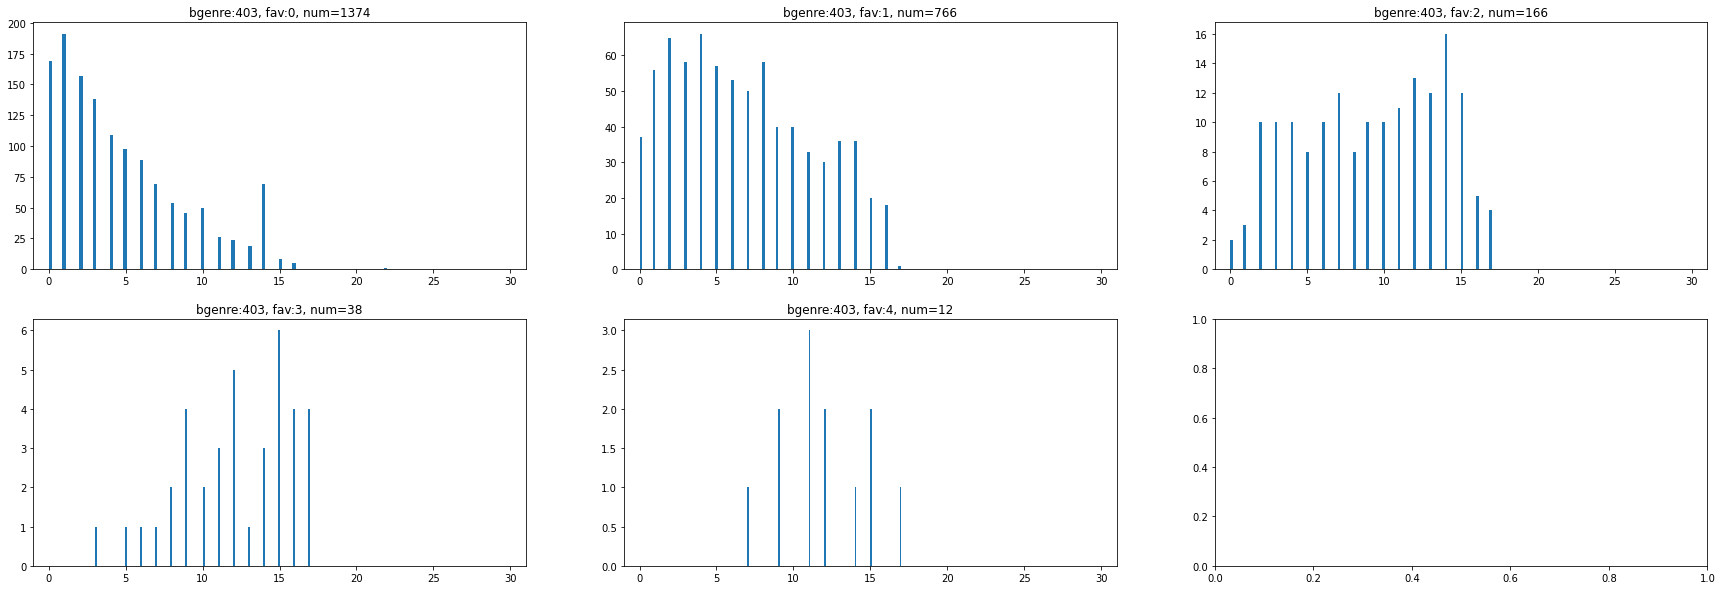

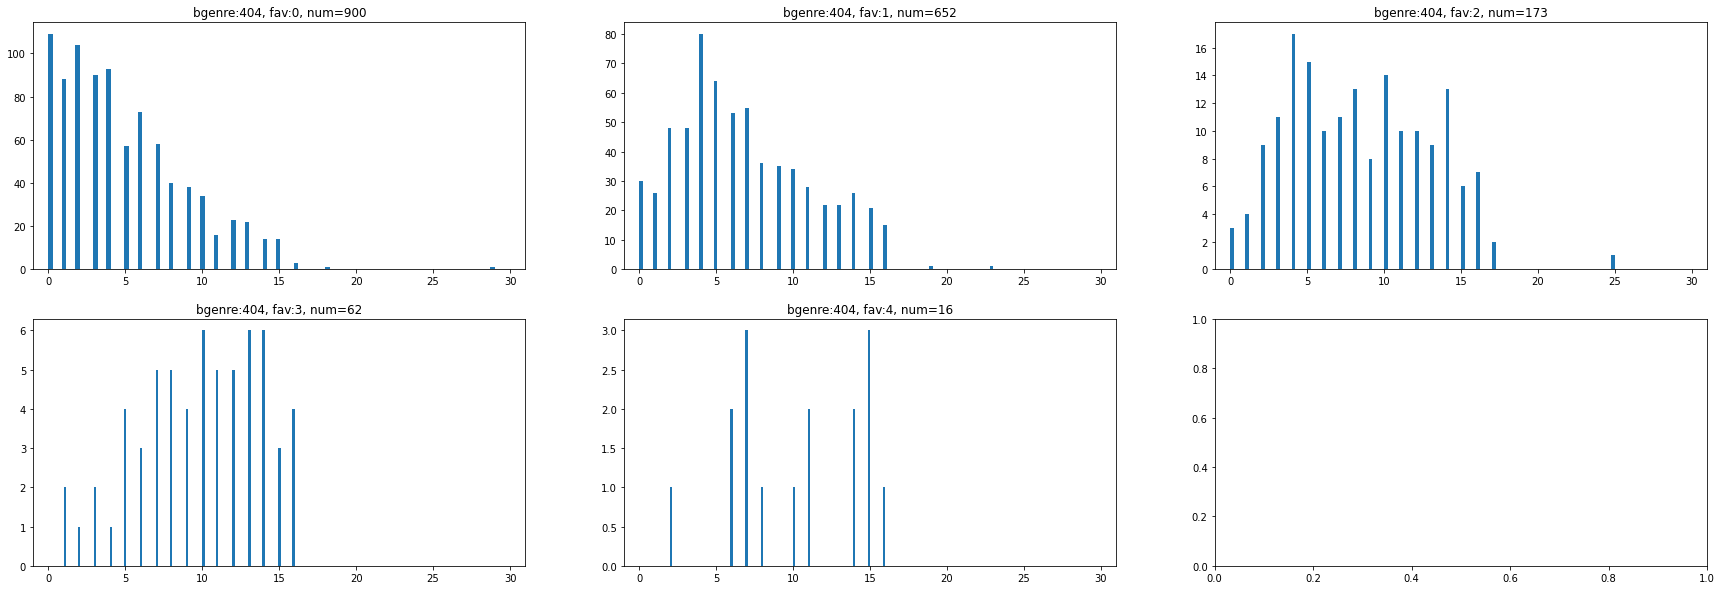

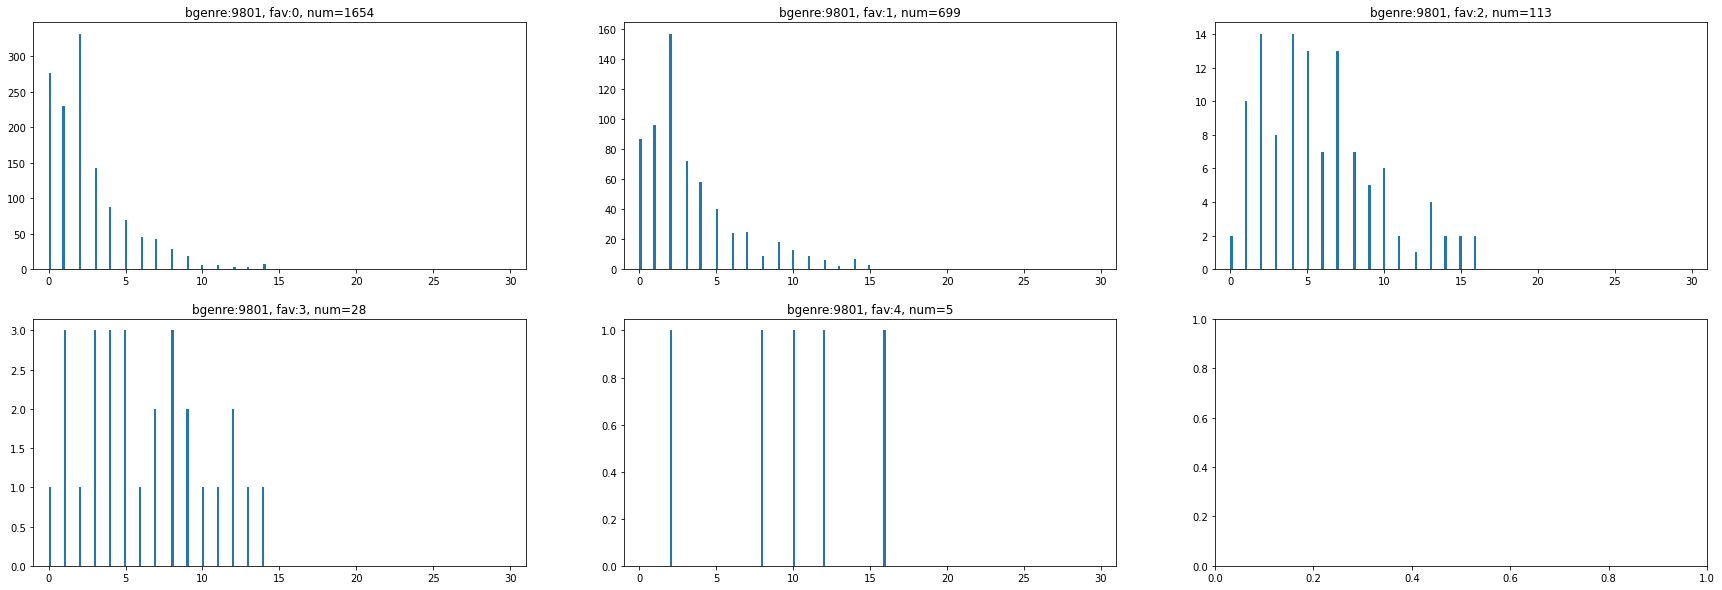

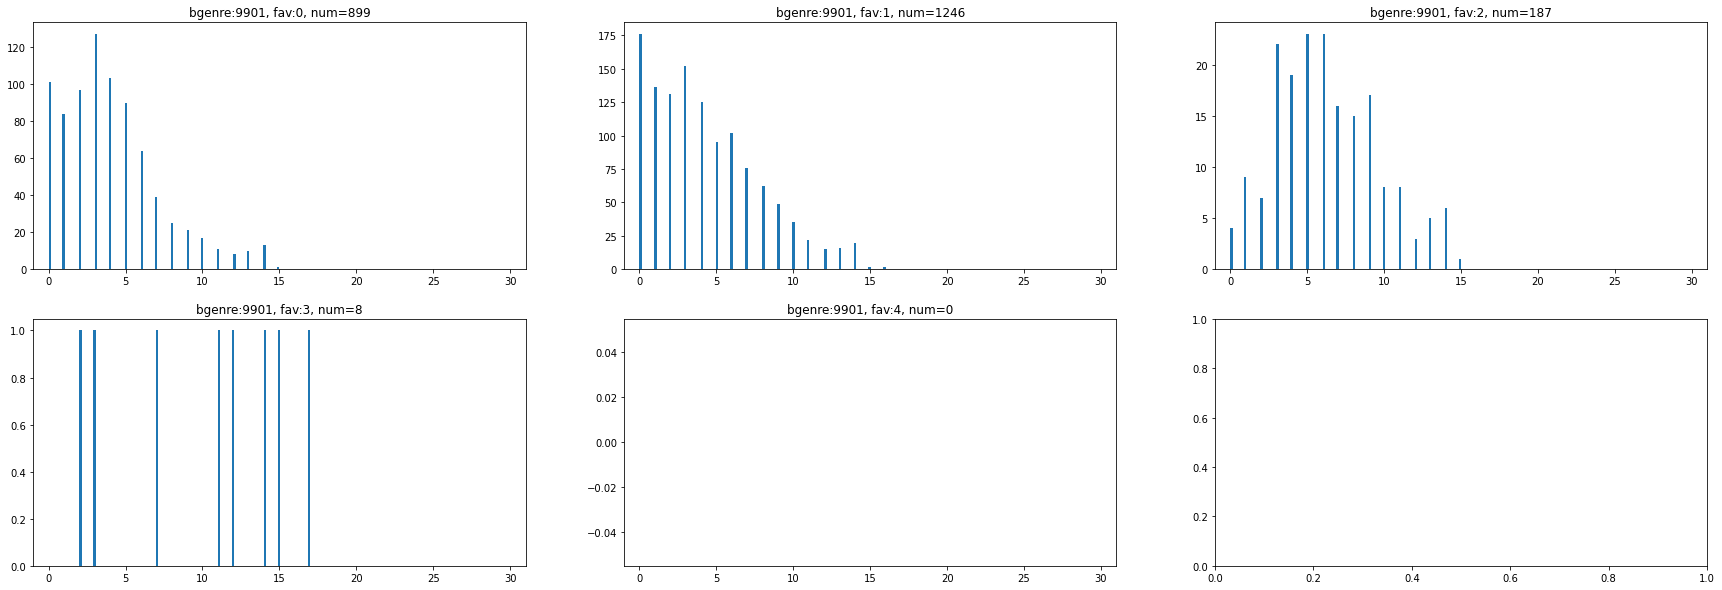

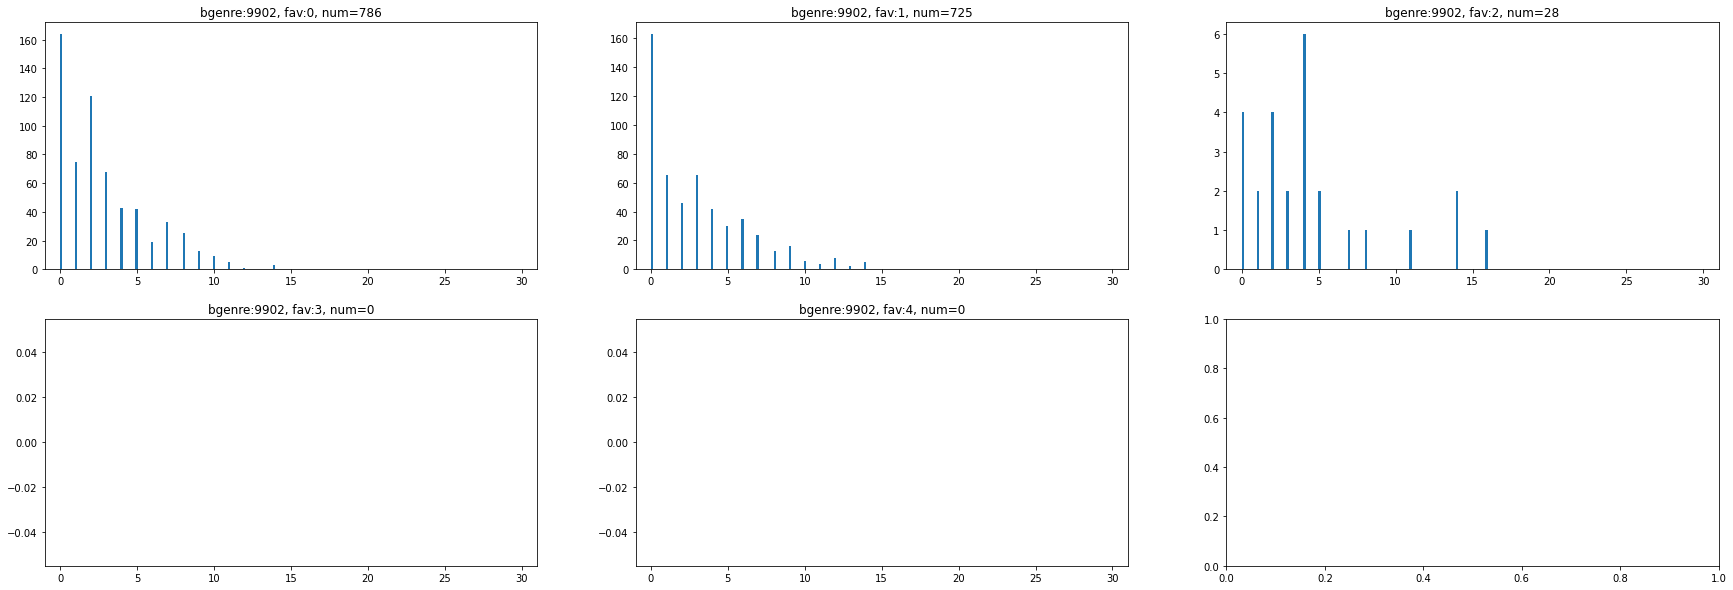

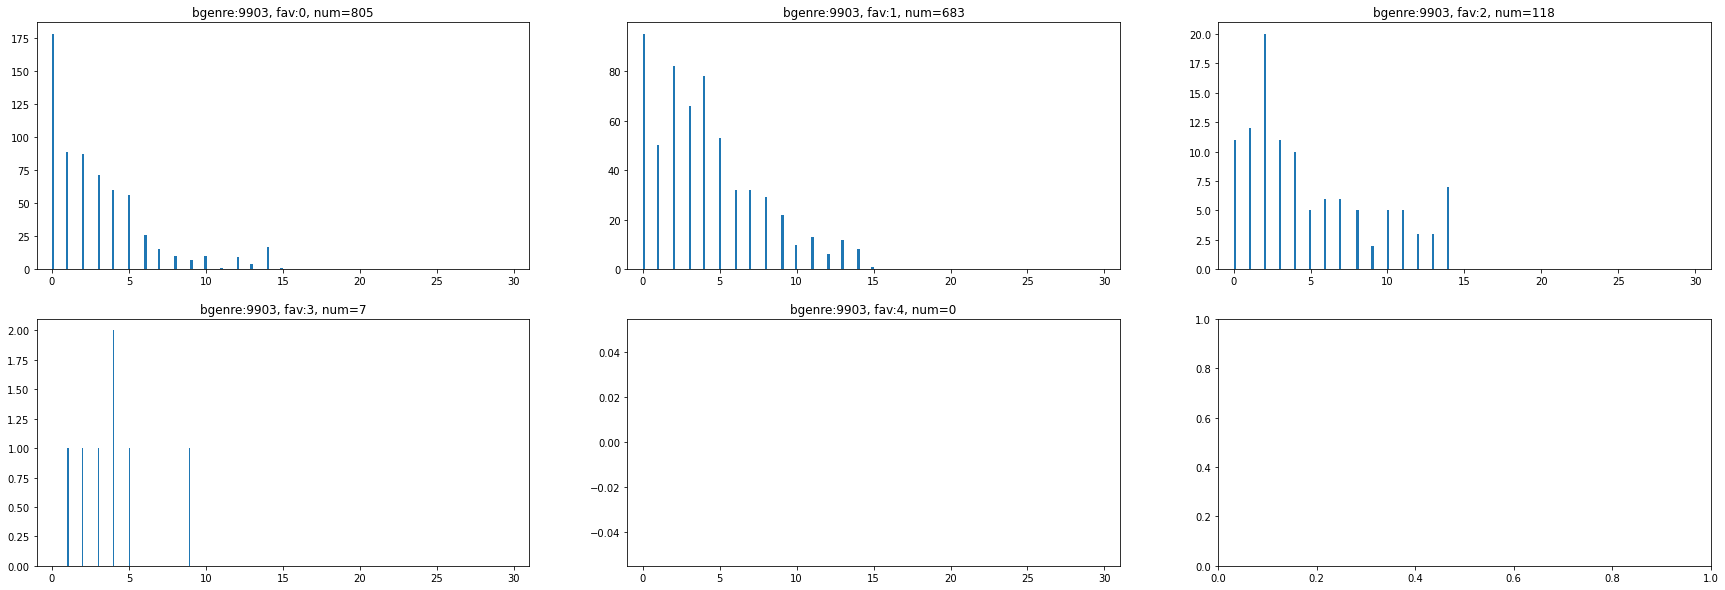

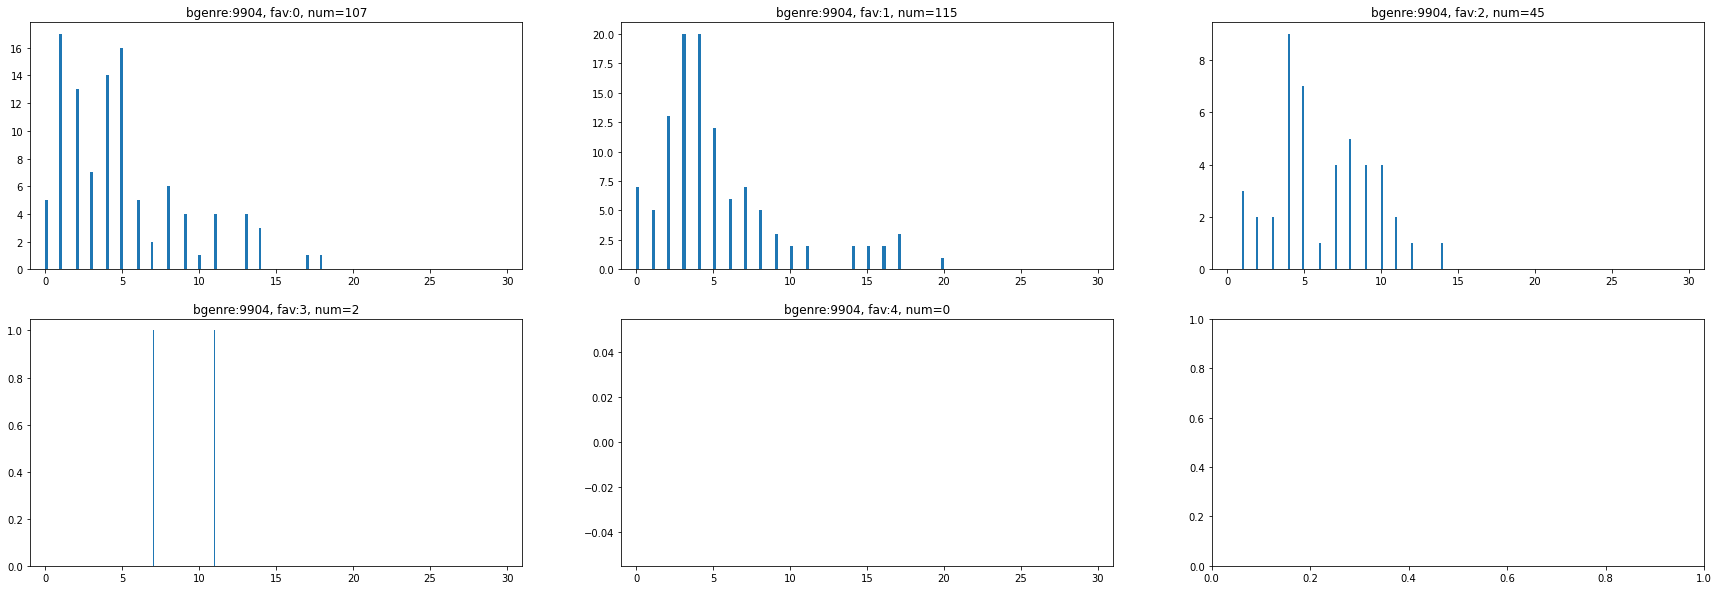

Error in callback <function flush_figures at 0x7fdfab28d790> (for post_execute):


KeyboardInterrupt: 

In [90]:
histEachFavsByCategory(train_df,train_df.keyword.str.count(' '), 'genre')

/home/wsato/work/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


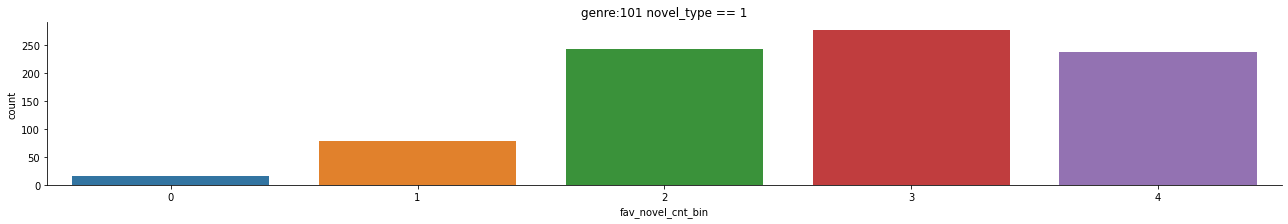

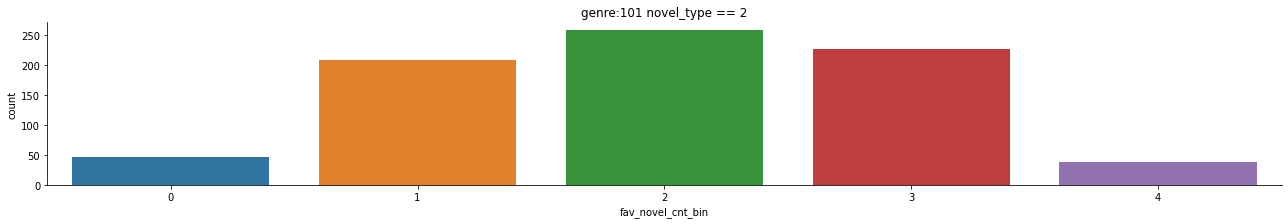

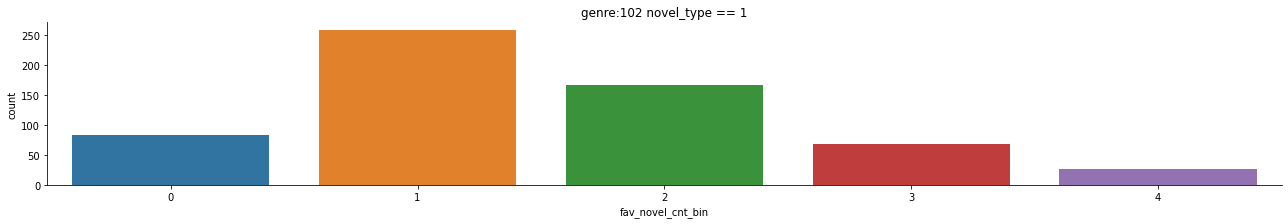

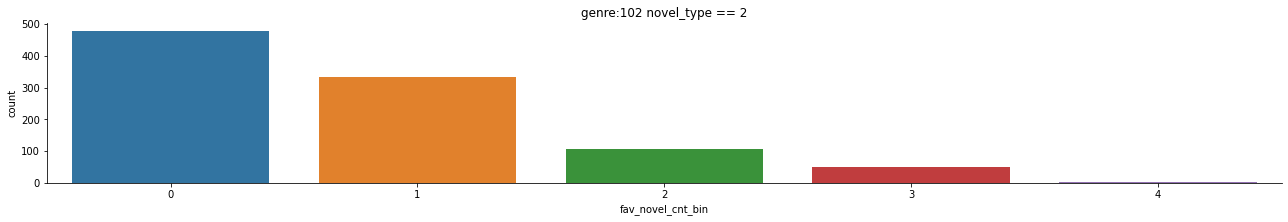

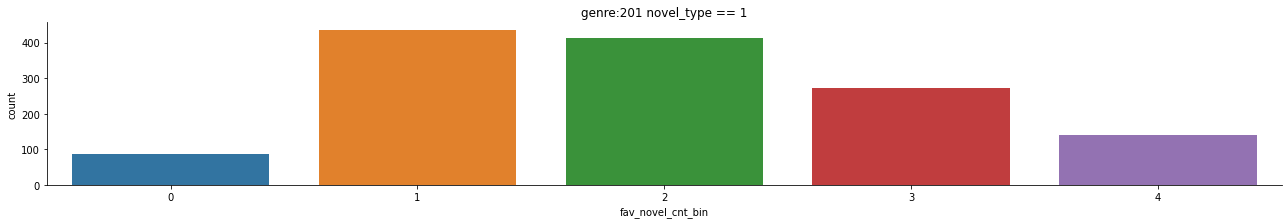

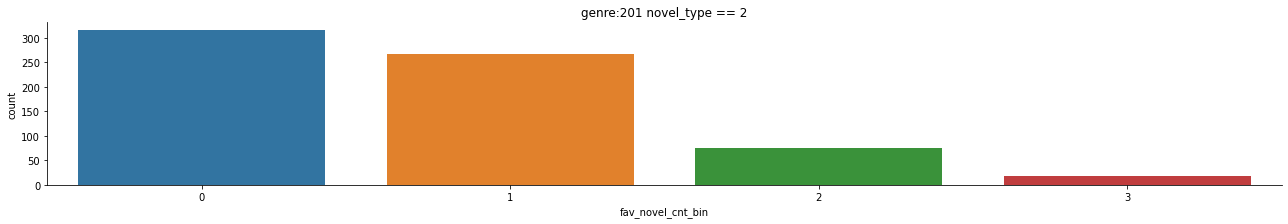

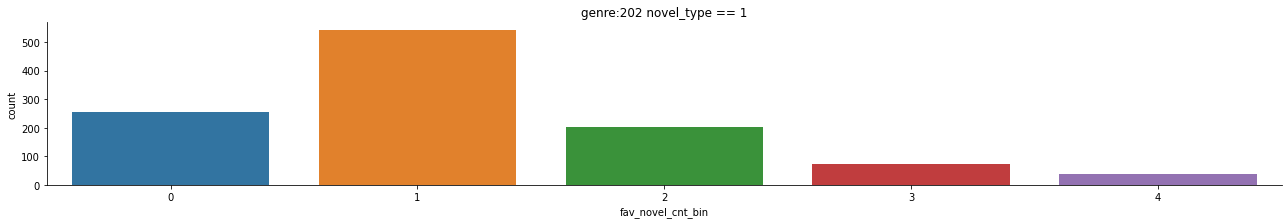

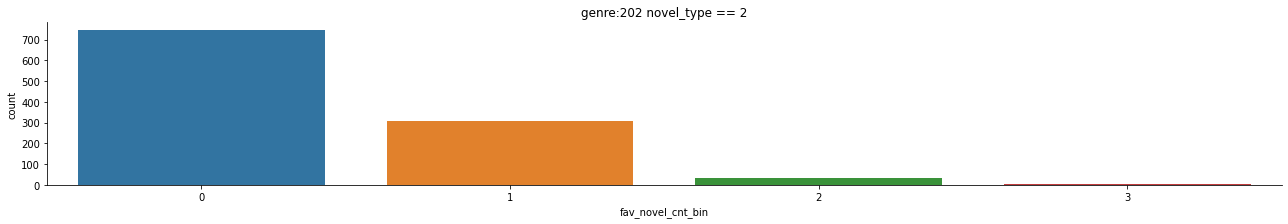

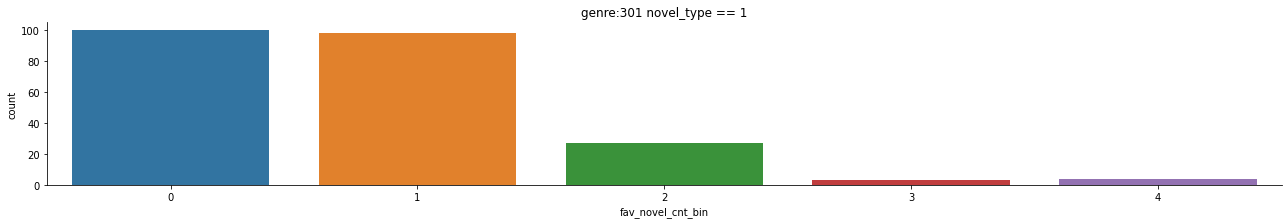

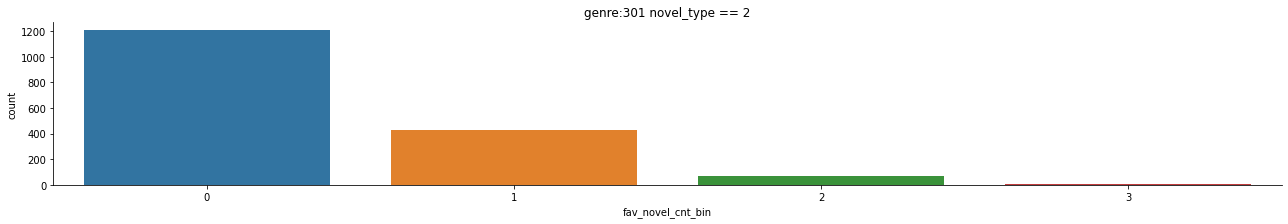

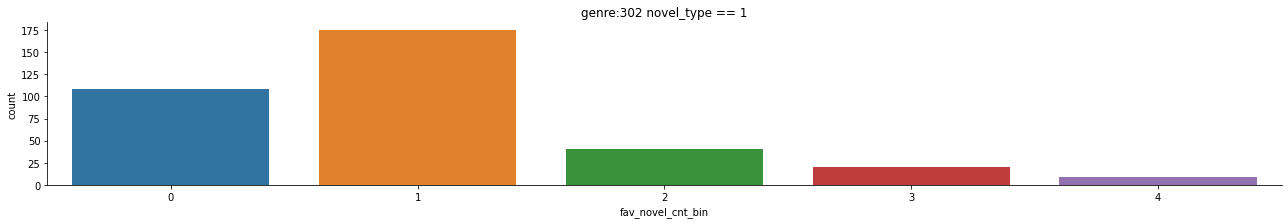

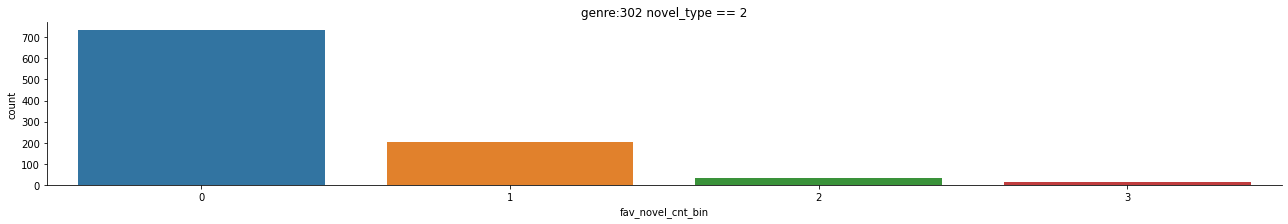

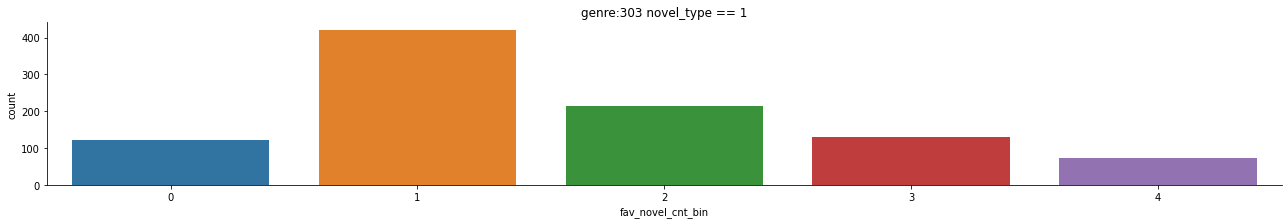

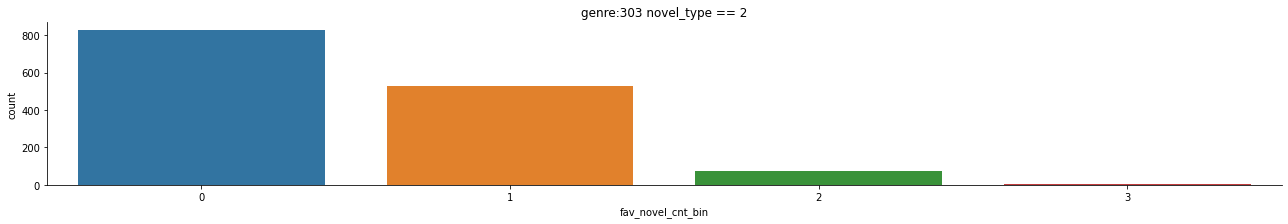

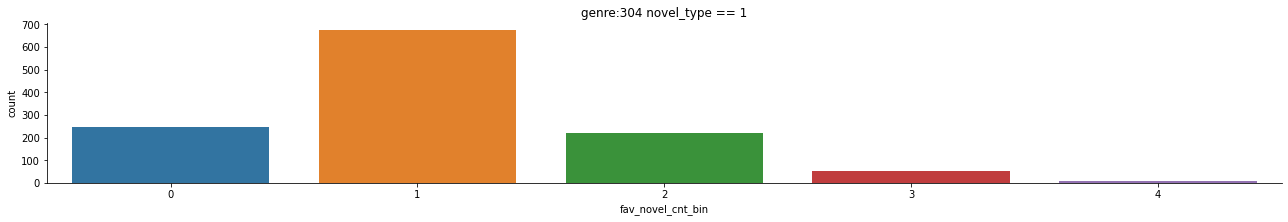

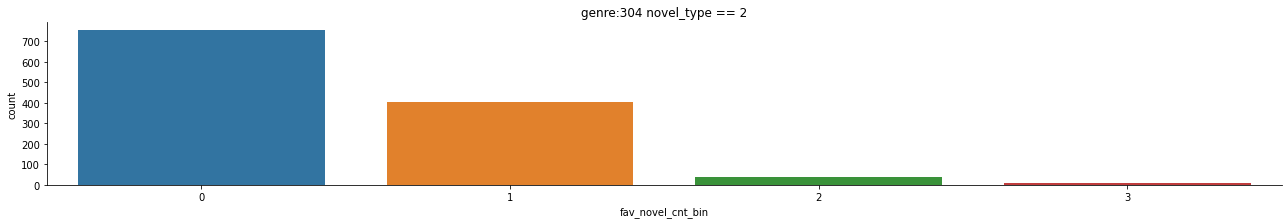

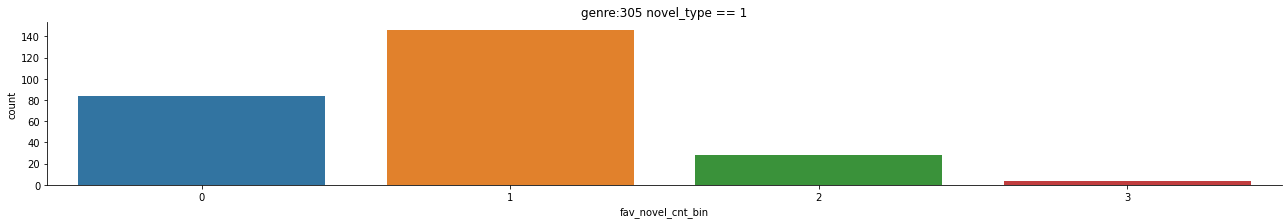

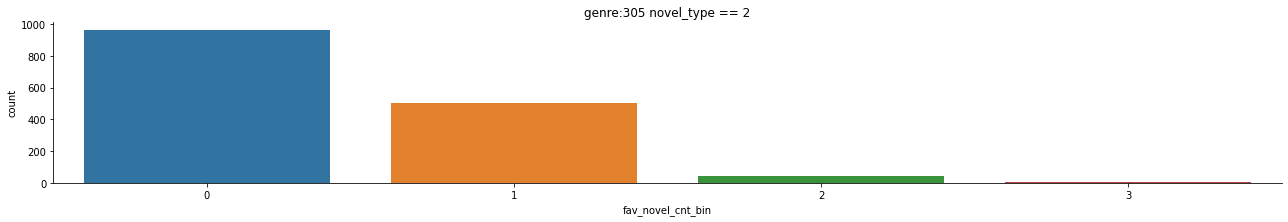

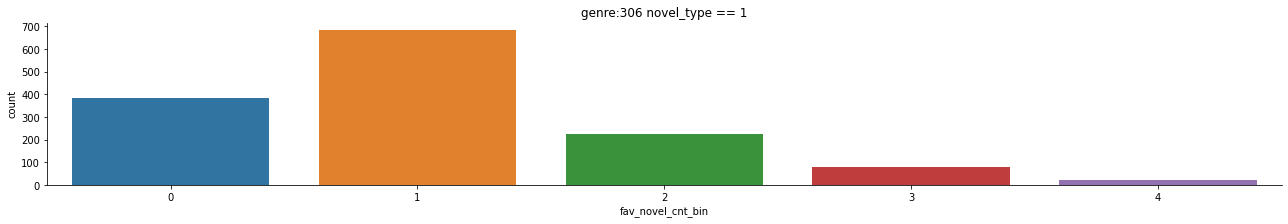

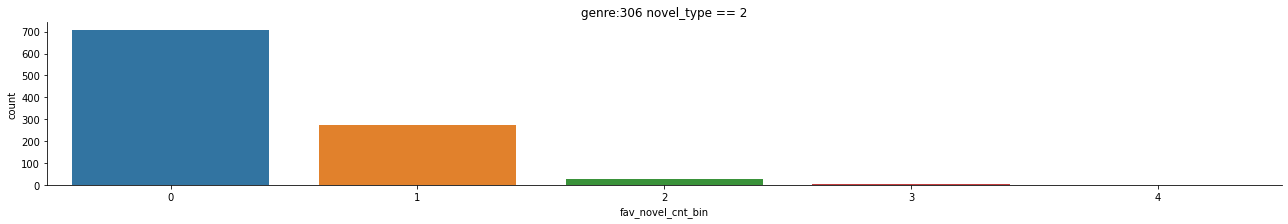

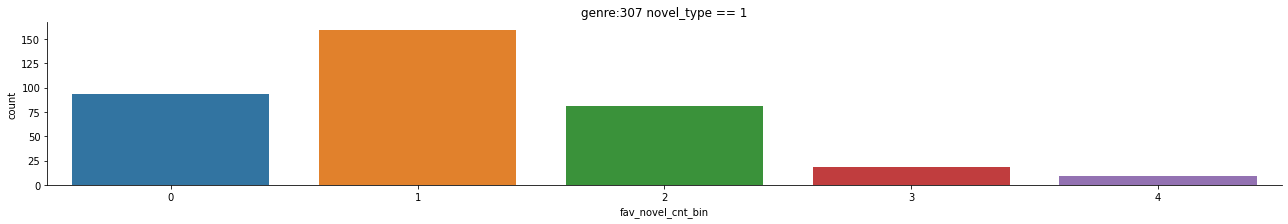

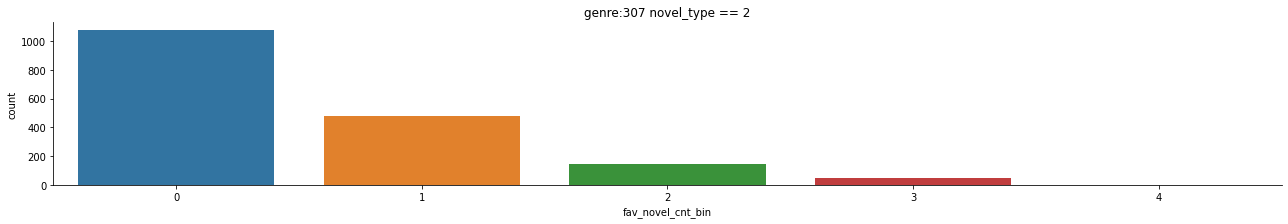

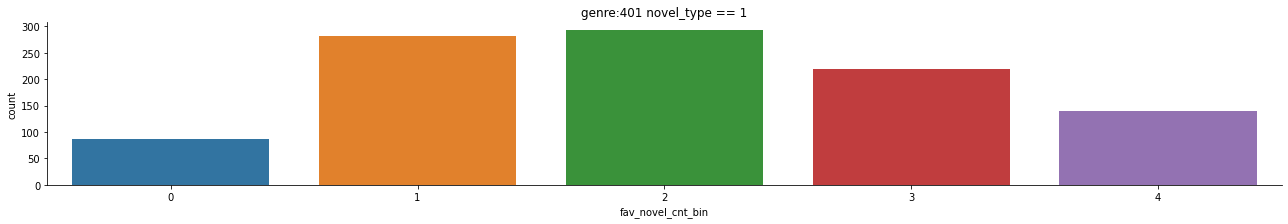

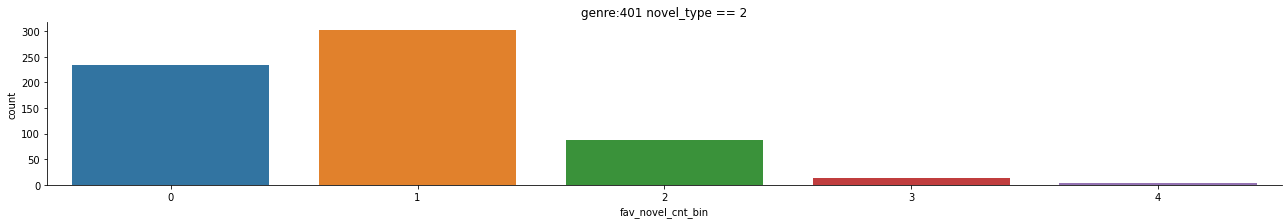

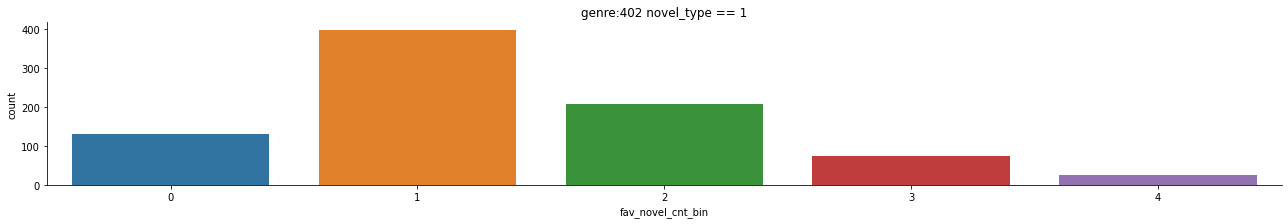

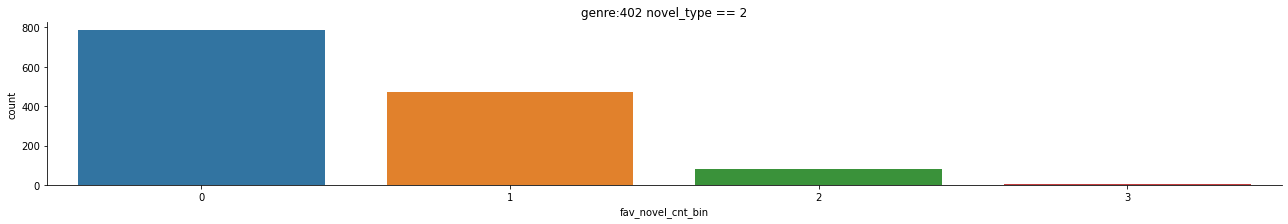

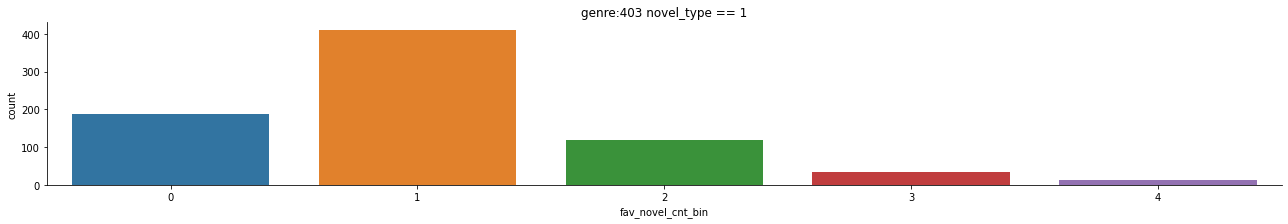

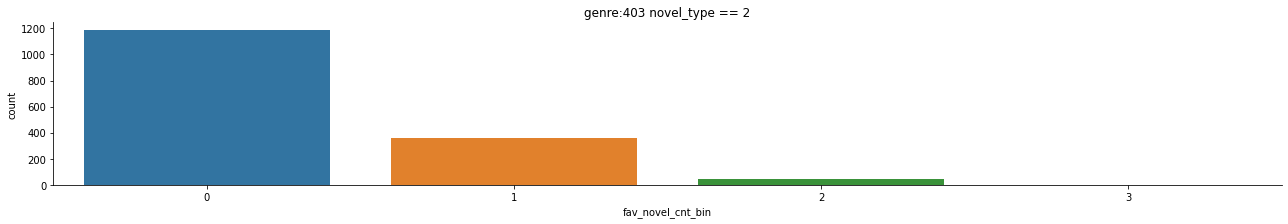

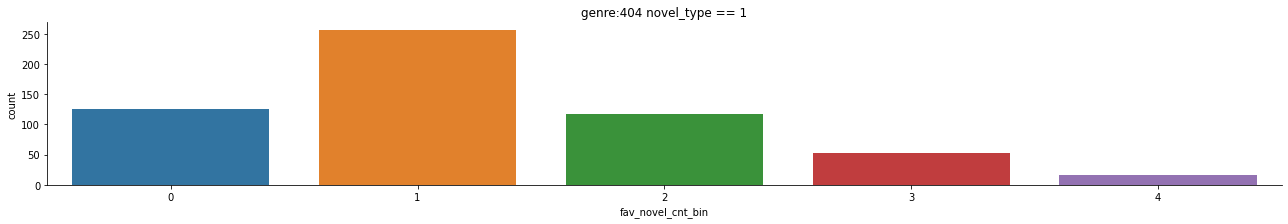

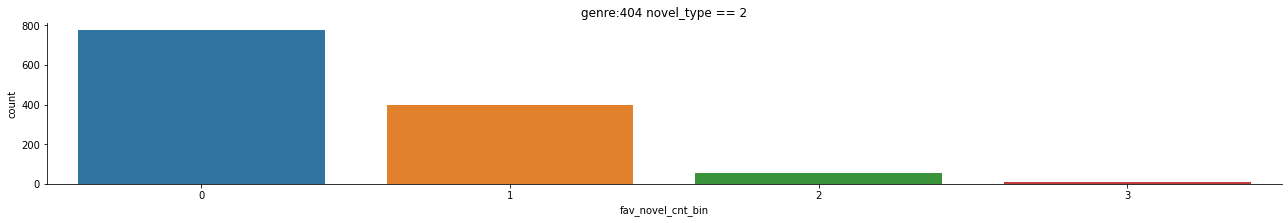

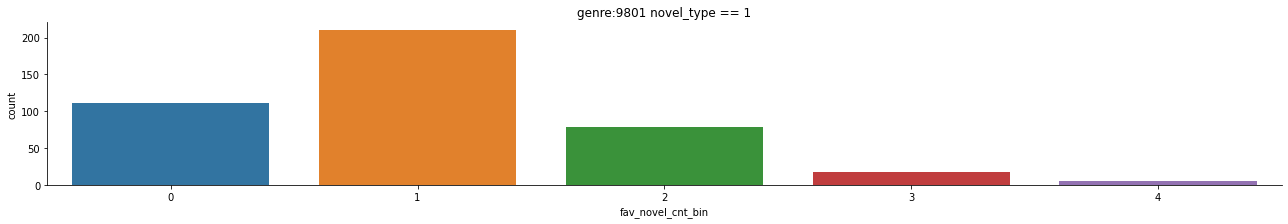

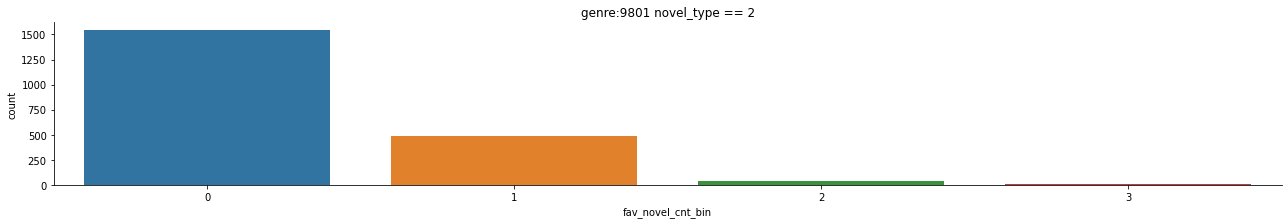

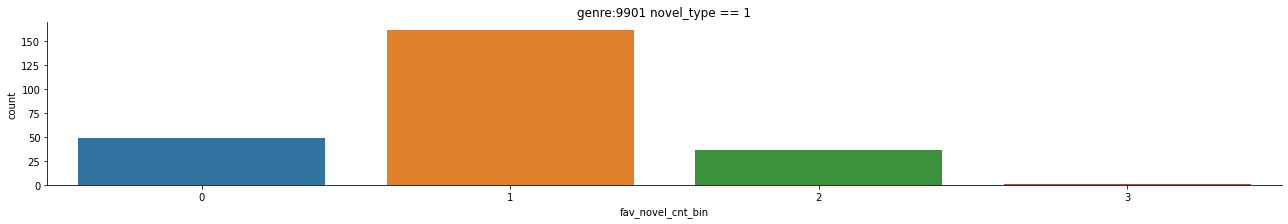

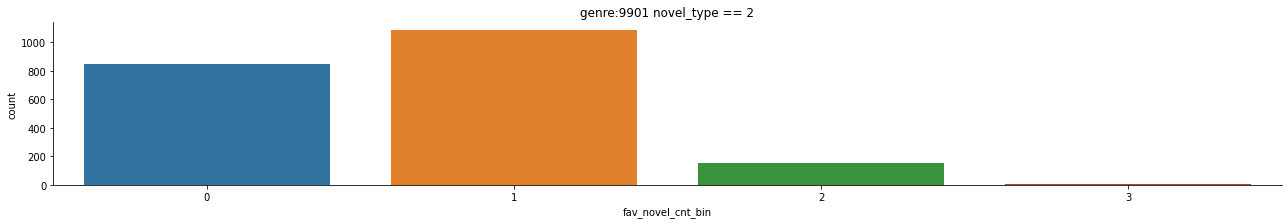

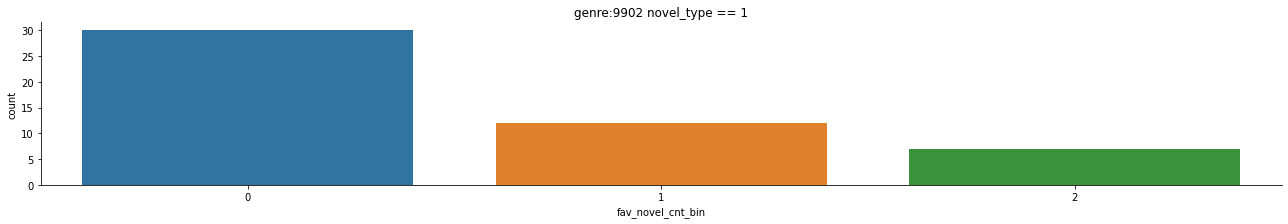

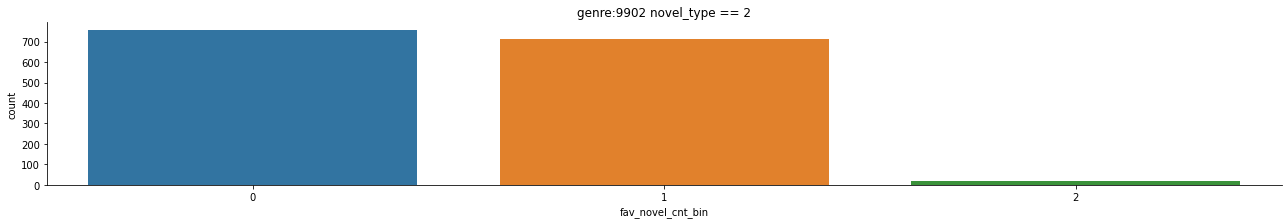

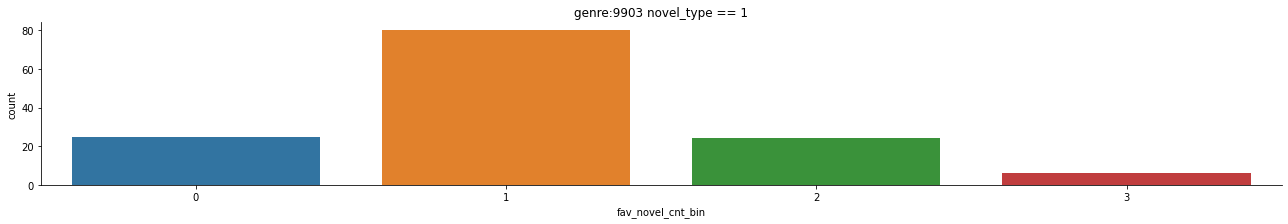

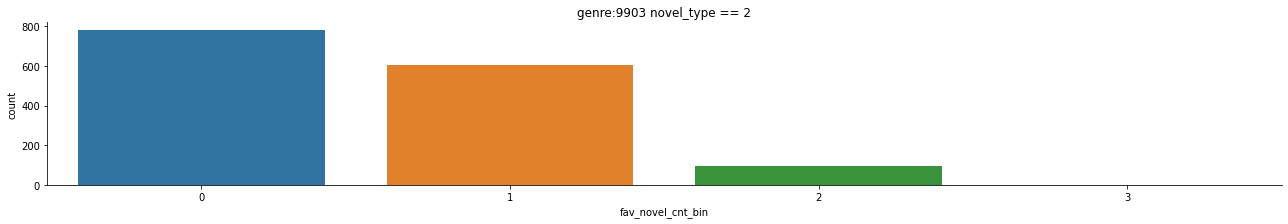

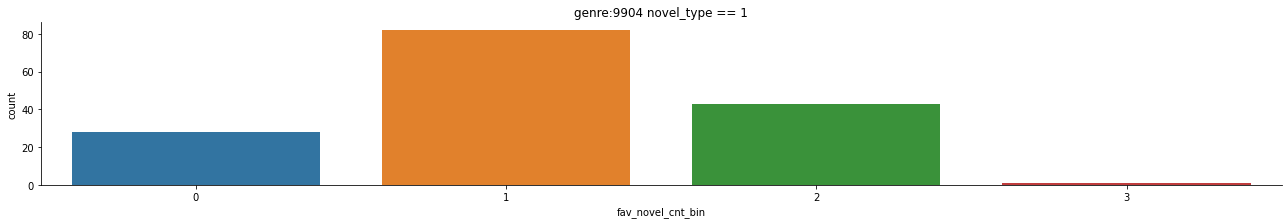

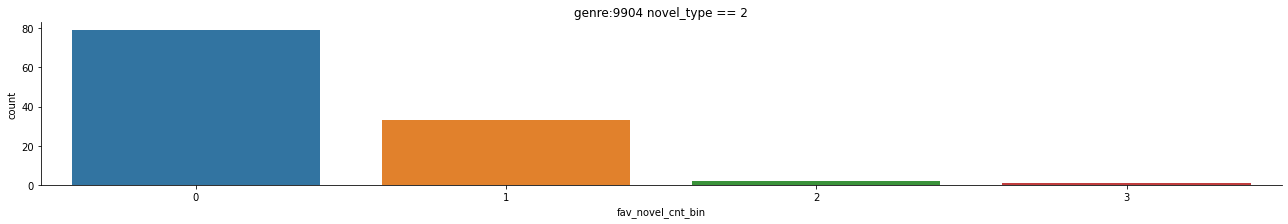

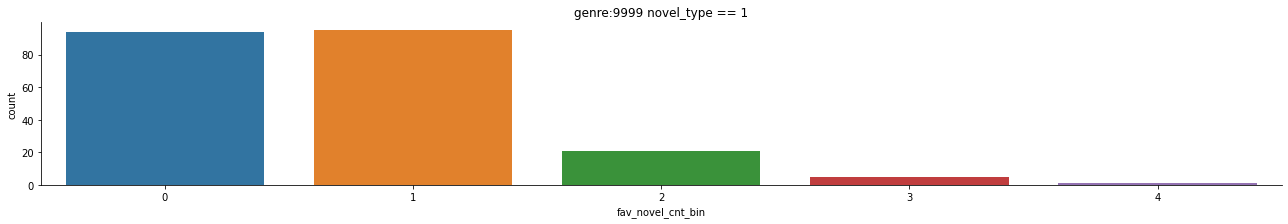

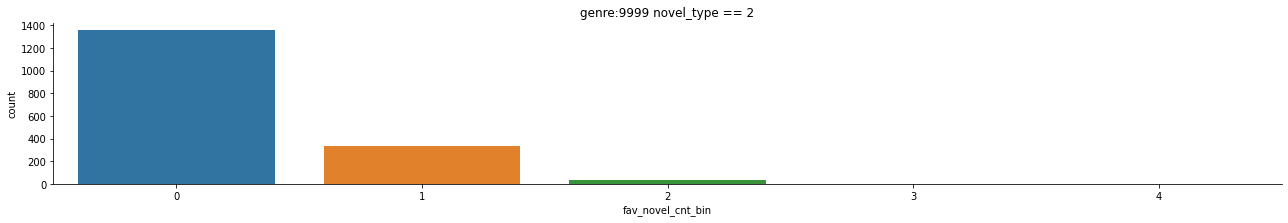

In [107]:
for genre in columnUnique(train_df, 'genre'):
    histColumnsFavs(train_df.query('genre == @genre'), ['novel_type'],title=f'genre:{genre}')